# Project Title: Unified Conversation Analytics Platform for Reducing Customer Abandonment

**Project Summary**
 - This project focuses on identifying, predicting, and reducing customer drop-offs across digital service channels, including Chatbots, WhatsApp, and Web Chat. Using a unified Conversation Master Table with 10,000 multi-channel customer interactions, the project analyzes user behavior, flow navigation patterns, NLU performance, latency issues, device attributes, and agent handoff metrics to uncover the key reasons customers abandon support sessions mid-conversation.

 - A comprehensive data pipeline ingests raw messages, session events, agent transfer logs, system metrics, and NLU metadata to generate a single source of truth — the conversation_master_fact table. This master dataset enables detailed funnel analysis, flow-node drop-off identification, latency correlation, and ML-driven abandonment prediction.

 - Through exploratory analysis, feature engineering, and pattern detection, the project pinpoints high-impact issues such as long bot response times, repeated NLU fallbacks, unclear flow nodes, client-side errors, and long wait times during agent transfers. The project also examines customer segments, device/browser behavior, and engagement metrics to propose targeted optimizations.

 - The output includes actionable insights, dashboards, predictive indicators, and optimization recommendations that improve customer service efficiency, enhance user experience, and significantly reduce abandonment rates across digital support channels. This project demonstrates expertise in data engineering, advanced analytics, conversational AI evaluation, and real-world problem solving in a Service Cloud environment.

**Problem Statements**
 - Customers engaging through digital support channels such as Chatbots, WhatsApp, and Web Chat are frequently abandoning conversations before reaching resolution, resulting in incomplete support journeys, reduced customer satisfaction, and increased operational load on service teams. Despite strong adoption of digital channels, a significant percentage of users exit the session during critical points in the conversation flow, often without providing explicit feedback. This makes it difficult for organizations to identify where breakdowns occur, why customers disengage, and which system or flow-related factors contribute to abandonment.

 - The problem becomes more complex because customer drop-offs are influenced by multiple variables including bot response latency, repeated fallback intents, unclear or lengthy flow steps, device-specific issues, network interruptions, and long queue times for agent handoffs. The existing system does not provide a unified view of all these signals, making it challenging to trace drop-offs to specific flow nodes, intents, or performance patterns. Without consolidated analytics, businesses struggle to continuously optimize digital interactions and improve customer experience.

 - Therefore, the core problem addressed by this project is the need to detect, diagnose, and reduce customer drop-offs across all digital service channels by building an integrated dataset, analyzing conversation behavior, identifying root causes, and generating actionable insights that enable product and service teams to enhance conversational flows, improve system performance, and deliver seamless customer experiences.

## Load Libraries

In [1]:
# Load all possible Libraries...
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date & time handling
from datetime import datetime

## Load the Dataset

In [2]:
# Load our dataset credit_applications_master_10000.csv
df_conversation_analytics = pd.read_csv('conversation_master_fact_sample_10000.csv')

In [3]:
# Show the First 5 Observation of the data
df_conversation_analytics.head(5)

,conversation_id,user_id,anon_user_id,account_id,start_ts,end_ts,channel,session_status,abandonment_flag,abandonment_ts,...,geo_country,client_error_count,transfer_requested_ts,transfer_completed_ts,time_to_agent_sec,kb_suggestion_shown,kb_article_clicked,csat_rating,predicted_abandon_prob,ingestion_ts
0,conv_d579265bbcc4,user_183,anon_6d76e6e7b8,acct_228,09:25.4,56:09.4,web_chat,completed,False,NaN,...,GB,0,NaN,NaN,NaN,False,False,5.0,0.205,14:14.4
1,conv_117cf1dd3ccf,user_1104,anon_ce72849660,acct_1102,48:35.3,58:24.3,sms,completed,False,NaN,...,IN,0,NaN,NaN,NaN,False,False,4.0,0.030,54:05.3
2,conv_05560f5be97f,user_1249,anon_7b24b792a4,NaN,49:36.0,09:05.0,whatsapp,completed,False,NaN,...,GB,0,NaN,NaN,NaN,False,False,NaN,0.263,56:15.0
3,conv_b31f9460496d,user_2441,anon_cbe31df11e,NaN,34:05.3,17:35.3,whatsapp,abandoned,True,43:02.3,...,AU,0,NaN,NaN,NaN,False,False,5.0,0.097,35:50.3
4,conv_052760982675,user_1543,anon_d5dd23306f,acct_822,39:41.6,01:51.6,web_chat,completed,False,NaN,...,ZA,0,NaN,NaN,NaN,False,False,2.0,0.226,47:25.6


In [4]:
# Show the First 5 Observation of the data
df_conversation_analytics.tail(5)

,conversation_id,user_id,anon_user_id,account_id,start_ts,end_ts,channel,session_status,abandonment_flag,abandonment_ts,...,geo_country,client_error_count,transfer_requested_ts,transfer_completed_ts,time_to_agent_sec,kb_suggestion_shown,kb_article_clicked,csat_rating,predicted_abandon_prob,ingestion_ts
9995,conv_e203e0ff52ab,NaN,anon_1fc8b99d2f,acct_278,50:48.0,44:22.0,bot,timed_out,False,NaN,...,US,0,NaN,NaN,NaN,False,False,1.0,0.072,55:35.0
9996,conv_f3972475d42b,user_2642,anon_3873cbbf10,acct_1124,57:44.5,01:55.5,bot,completed,False,NaN,...,BR,0,NaN,NaN,NaN,False,False,2.0,0.713,01:30.5
9997,conv_975210f6d003,NaN,anon_4bcea18dcc,acct_168,58:55.8,46:49.8,bot,completed,False,NaN,...,US,0,NaN,NaN,NaN,False,False,1.0,0.158,04:07.8
9998,conv_adaf0322321b,user_1352,anon_26eb556a39,acct_1152,52:58.2,37:39.2,web_chat,completed,False,NaN,...,CA,0,NaN,NaN,NaN,False,False,NaN,0.247,02:57.2
9999,conv_805b7cd34194,user_2173,anon_76b848dac9,acct_945,29:44.3,09:08.3,web_chat,completed,False,NaN,...,IN,0,NaN,NaN,NaN,True,False,1.0,0.495,31:39.3


## Data Overview

### About Data Overview

**About Datasources**

The dataset used in this project represents a consolidated view of customer support interactions across digital service channels including web chat, WhatsApp, and chatbot interfaces. It contains 10,000 conversation-level records, each capturing the full lifecycle of a customer session from initiation to completion or abandonment. The table combines key behavioral indicators such as message counts, bot latency, fallback occurrences, intent classifications, flow traversal details, and user engagement patterns. It also integrates device and browser information, geographic attributes, KB interaction metrics, and predictive fields that estimate the likelihood of session abandonment. Additional operational signals such as escalation timestamps, transfer performance, client errors, and satisfaction ratings help establish a detailed understanding of service quality. This unified dataset serves as a comprehensive analytical foundation for identifying drop-off points, diagnosing performance issues within the service flow, and developing actionable insights to improve customer experience and automation efficiency across all digital channels.

### Check the columns

In [5]:
# Check the columns of the data
df_conversation_analytics.columns

Index(['conversation_id', 'user_id', 'anon_user_id', 'account_id', 'start_ts',
       'end_ts', 'channel', 'session_status', 'abandonment_flag',
       'abandonment_ts', 'abandonment_turn', 'abandonment_flow_node',
       'dropoff_reason_code', 'total_turns', 'user_message_count',
       'bot_message_count', 'avg_bot_latency_ms', 'fallback_count',
       'initial_intent', 'top_intent', 'top_intent_conf', 'flow_id',
       'flow_version', 'widget_version', 'widget_load_ms', 'device_type',
       'browser', 'geo_country', 'client_error_count', 'transfer_requested_ts',
       'transfer_completed_ts', 'time_to_agent_sec', 'kb_suggestion_shown',
       'kb_article_clicked', 'csat_rating', 'predicted_abandon_prob',
       'ingestion_ts'],
      dtype='object')

**Interpretation about Columns Names**

**conversation_id** 
Unique identifier for each conversation session, used as the primary reference key.

**user_id**  
Identifier for a known or logged-in user; may be null for anonymous interactions.

**anon_user_id**  
Automatically generated ID for anonymous visitors to track behavior across sessions.

**account_id**  
Represents the customer’s organization or business account associated with the conversation.

**start_ts**  
Timestamp indicating when the conversation started.

**end_ts**  
Timestamp for when the conversation ended; may be null if the session is still open.

**channel**  
Digital platform used by the user such as web chat, WhatsApp, bot, or SMS.

**session_status**  
Final outcome of the conversation (completed, abandoned, escalated, timed_out, handed_off).

**abandonment_flag**  
Boolean indicating whether the conversation ended due to a user drop-off or abandonment.

**abandonment_ts**  
Timestamp capturing when abandonment occurred, based on last event or inactivity.

**abandonment_turn**  
Conversation turn number at which the user dropped off, showing how far they progressed.

**abandonment_flow_node**  
The specific flow step or node where the user exited the conversation.

**dropoff_reason_code**  
Categorized reason explaining why the session was abandoned (e.g., CLIENT_ERROR, TIMEOUT).

**total_turns**  
Total number of messages exchanged between user and bot/agent during the session.

**user_message_count**  
Number of messages sent by the user.

**bot_message_count**  
Number of messages sent by the bot; helps measure bot activity and engagement.

**avg_bot_latency_ms**  
Average time in milliseconds the bot took to respond to user messages.

**fallback_count**  
Count of NLU fallbacks where the bot failed to understand the user’s intent.

**initial_intent**  
The first detected user intent at the start of the conversation.

**top_intent**  
The most dominant or frequently detected intent across the full conversation.

**top_intent_conf**  
Confidence score associated with the top intent prediction.

**flow_id** 
Identifier for the conversational flow used in the session (e.g., billing flow, reset flow).

**flow_version**  
Version of the conversational flow, useful for tracking performance of flow updates.

**widget_version**  
Version of the chat widget or interface used by the user.

**widget_load_ms**  
Time in milliseconds taken for the chat widget to load on the user’s device.

**device_type**  
Type of device used by the user such as desktop, mobile, or tablet.

**browser**  
Browser used during the session, e.g., Chrome, Firefox, Safari.

**geo_country**  
Country from which the user accessed the service.

**client_error_count**  
Number of client-side errors such as browser issues or widget failures encountered.

**transfer_requested_ts**  
Timestamp when the bot or user initiated a transfer to a live agent.

**transfer_completed_ts**  
Timestamp when the agent actually picked up the transferred conversation.

**time_to_agent_sec**  
Total wait time in seconds between transfer request and agent pickup.

**kb_suggestion_shown**  
Indicates whether a knowledge base suggestion was displayed during the conversation.

**kb_article_clicked** 
Shows whether the user clicked on a recommended knowledge base article.

**csat_rating**  
Customer satisfaction rating provided by the user at the end of the session (1–5).

**predicted_abandon_prob** 

Model-generated probability estimating the likelihood of conversation abandonment.

**ingestion_ts**  
Timestamp when the record was ingested into the analytics warehouse or data system.


### Shape of the Data

In [6]:
# Shape of the Data
df_conversation_analytics.shape

(10000, 37)

**Interpretation of Shape**
 - The dataset contains 10000 individual records.
 - The dataset contains 37 different features/variables.

### Information of Data

In [7]:
# Information of the Data
df_conversation_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   conversation_id         10000 non-null  object 
 1   user_id                 7975 non-null   object 
 2   anon_user_id            10000 non-null  object 
 3   account_id              5904 non-null   object 
 4   start_ts                10000 non-null  object 
 5   end_ts                  9796 non-null   object 
 6   channel                 10000 non-null  object 
 7   session_status          10000 non-null  object 
 8   abandonment_flag        10000 non-null  bool   
 9   abandonment_ts          2990 non-null   object 
 10  abandonment_turn        2990 non-null   float64
 11  abandonment_flow_node   2990 non-null   object 
 12  dropoff_reason_code     2990 non-null   object 
 13  total_turns             10000 non-null  int64  
 14  user_message_count      10000 non-null 

**Interpretation of info()**

The dataset contains 10,000 records and 37 columns.

Non-null values:
Most columns are fully populated with 10,000 non-null values, indicating strong data completeness.  
However, several fields contain missing values that reflect real conversational behavior rather than data quality issues.

Columns with missing values:
- user_id has 7,975 non-null entries, meaning some users interacted anonymously.
- account_id has 5,904 non-null entries, showing not all users belong to mapped customer accounts.
- end_ts has 9,796 non-null values, suggesting a small number of ongoing or interrupted sessions.
- abandonment_ts, abandonment_turn, abandonment_flow_node, and dropoff_reason_code each have 2,990 non-null values, matching the number of abandoned sessions.
- transfer_requested_ts has 1,200 non-null values, while transfer_completed_ts and time_to_agent_sec have 835, meaning only a fraction of sessions required escalation to an agent.
- csat_rating has 6,160 non-null values, indicating that many users did not complete a satisfaction survey.

Data types:
- 22 object (string) columns capturing IDs, timestamps, devices, intents, browser info, and identifiers.
- 6 float columns representing scores, confidence levels, latency metrics, and predicted abandonment probabilities.
- 6 integer columns covering message counts, turns, latency times, and error counts.
- 3 boolean columns tracking abandonment_flag, kb_suggestion_shown, and kb_article_clicked.

Memory usage:
The dataset uses approximately a few megabytes, which is well-optimized and efficient for modeling, analytics, and pipeline processing.

Overall:
The dataset is comprehensive and analytically rich, with complete coverage for structural identifiers, timestamps, channels, intents, conversational metrics, device attributes, and predictive probabilities. Missing values in abandonment and transfer-related fields are expected and correspond to specific user behaviors rather than data gaps. The structure is ideal for studying drop-offs, analyzing conversation flows, modeling abandonment probability, evaluating user experience performance, and optimizing service automation efficiency.


## Data preprocessing

### Data Cleaning

In [8]:
# Rename the irrelevant columns
df_conversation_analytics = df_conversation_analytics.rename(columns={
    'conversation_id': 'Conversation ID',
    'user_id': 'User ID',
    'anon_user_id': 'Anonymous User ID',
    'account_id': 'Account ID',
    'start_ts': 'Start TS',
    'end_ts': 'End TS',
    'channel': 'Channel',
    'session_status': 'Session Status',
    'abandonment_flag': 'Abandonment Flag',
    'abandonment_ts': 'Abandonment TS',
    'abandonment_turn': 'Abandonment Turn',
    'abandonment_flow_node': 'Abandonment Flow Node',
    'dropoff_reason_code': 'Dropoff Reason Code',
    'total_turns': 'Total Turns',
    'user_message_count': 'User Message Count',
    'bot_message_count': 'Bot Message Count',
    'avg_bot_latency_ms': 'Avg Bot Latency (ms)',
    'fallback_count': 'Fallback Count',
    'initial_intent': 'Initial Intent',
    'top_intent': 'Top Intent',
    'top_intent_conf': 'Top Intent Confidence',
    'flow_id': 'Flow ID',
    'flow_version': 'Flow Version',
    'widget_version': 'Widget Version',
    'widget_load_ms': 'Widget Load (ms)',
    'device_type': 'Device Type',
    'browser': 'Browser',
    'geo_country': 'Geo Country',
    'client_error_count': 'Client Error Count',
    'transfer_requested_ts': 'Transfer Requested TS',
    'transfer_completed_ts': 'Transfer Completed TS',
    'time_to_agent_sec': 'Time to Agent (sec)',
    'kb_suggestion_shown': 'KB Suggestion Shown',
    'kb_article_clicked': 'KB Article Clicked',
    'csat_rating': 'CSAT Rating',
    'predicted_abandon_prob': 'Predicted Abandon Probability',
    'ingestion_ts': 'Ingestion TS'
})
df_conversation_analytics.head(5)

,Conversation ID,User ID,Anonymous User ID,Account ID,Start TS,End TS,Channel,Session Status,Abandonment Flag,Abandonment TS,...,Geo Country,Client Error Count,Transfer Requested TS,Transfer Completed TS,Time to Agent (sec),KB Suggestion Shown,KB Article Clicked,CSAT Rating,Predicted Abandon Probability,Ingestion TS
0,conv_d579265bbcc4,user_183,anon_6d76e6e7b8,acct_228,09:25.4,56:09.4,web_chat,completed,False,NaN,...,GB,0,NaN,NaN,NaN,False,False,5.0,0.205,14:14.4
1,conv_117cf1dd3ccf,user_1104,anon_ce72849660,acct_1102,48:35.3,58:24.3,sms,completed,False,NaN,...,IN,0,NaN,NaN,NaN,False,False,4.0,0.030,54:05.3
2,conv_05560f5be97f,user_1249,anon_7b24b792a4,NaN,49:36.0,09:05.0,whatsapp,completed,False,NaN,...,GB,0,NaN,NaN,NaN,False,False,NaN,0.263,56:15.0
3,conv_b31f9460496d,user_2441,anon_cbe31df11e,NaN,34:05.3,17:35.3,whatsapp,abandoned,True,43:02.3,...,AU,0,NaN,NaN,NaN,False,False,5.0,0.097,35:50.3
4,conv_052760982675,user_1543,anon_d5dd23306f,acct_822,39:41.6,01:51.6,web_chat,completed,False,NaN,...,ZA,0,NaN,NaN,NaN,False,False,2.0,0.226,47:25.6


### Handling Null Values

In [9]:
# Find the Null values in our data
df_conversation_analytics.isnull().sum()

Conversation ID                     0
User ID                          2025
Anonymous User ID                   0
Account ID                       4096
Start TS                            0
End TS                            204
Channel                             0
Session Status                      0
Abandonment Flag                    0
Abandonment TS                   7010
Abandonment Turn                 7010
Abandonment Flow Node            7010
Dropoff Reason Code              7010
Total Turns                         0
User Message Count                  0
Bot Message Count                   0
Avg Bot Latency (ms)                0
Fallback Count                      0
Initial Intent                      0
Top Intent                          0
Top Intent Confidence               0
Flow ID                             0
Flow Version                        0
Widget Version                      0
Widget Load (ms)                    0
Device Type                         0
Browser     

In [10]:
# Calculate the Missing values
df_conversation_analytics.isnull().sum() / len(df_conversation_analytics) * 100

Conversation ID                   0.00
User ID                          20.25
Anonymous User ID                 0.00
Account ID                       40.96
Start TS                          0.00
End TS                            2.04
Channel                           0.00
Session Status                    0.00
Abandonment Flag                  0.00
Abandonment TS                   70.10
Abandonment Turn                 70.10
Abandonment Flow Node            70.10
Dropoff Reason Code              70.10
Total Turns                       0.00
User Message Count                0.00
Bot Message Count                 0.00
Avg Bot Latency (ms)              0.00
Fallback Count                    0.00
Initial Intent                    0.00
Top Intent                        0.00
Top Intent Confidence             0.00
Flow ID                           0.00
Flow Version                      0.00
Widget Version                    0.00
Widget Load (ms)                  0.00
Device Type              

In [11]:
# Above 70% missing values drop the columns names.
df_conversation_analytics.drop(columns = ['Transfer Requested TS','Transfer Completed TS','Time to Agent (sec)'],inplace = True)

In [12]:
# Fill the null values of Datetime columns
df_conversation_analytics['Abandonment TS'] = df_conversation_analytics['Abandonment TS'].fillna(pd.Timestamp("00:00:00"))

In [13]:
# Treat the Null Values 
df_conversation_analytics['Abandonment Turn'] = df_conversation_analytics['Abandonment Turn'].fillna('Abandonment Turn').mean

In [14]:
#If the missing value percentage is between 20% and 70%, impute the column with its mode.
df_conversation_analytics['Abandonment Flow Node'] = df_conversation_analytics['Abandonment Flow Node'].fillna(
    df_conversation_analytics['Abandonment Flow Node'].mode()[0])

df_conversation_analytics['Dropoff Reason Code'] = df_conversation_analytics['Dropoff Reason Code'].fillna(
    df_conversation_analytics['Dropoff Reason Code'].mode()[0])

In [15]:
#If the missing value percentage is between 20% and 70%, impute the column with its mode.
df_conversation_analytics['Account ID'] = df_conversation_analytics['Account ID'].fillna(
    df_conversation_analytics['Account ID'].mode()[0])

In [16]:
# In my dataset the percentage of the CSAT Rating is 38%.
df_conversation_analytics['CSAT Rating'] = df_conversation_analytics['CSAT Rating'].fillna(
    df_conversation_analytics['CSAT Rating'].mean)

# In this User ID columns the Null values is 20% .
# Fill with Descending to Ascending order to fill the null values 
df_conversation_analytics['User ID'] = df_conversation_analytics['User ID'].fillna(
    df_conversation_analytics['User ID'].mode()[0])

# Fill the End Ts columns with Datetime columns
df_conversation_analytics['End TS'] = df_conversation_analytics['End TS'].fillna(pd.Timestamp("00:00:00"))

In [17]:
# After treating the Null values , Check the Missing values 
df_conversation_analytics.isnull().sum()

Conversation ID                  0
User ID                          0
Anonymous User ID                0
Account ID                       0
Start TS                         0
End TS                           0
Channel                          0
Session Status                   0
Abandonment Flag                 0
Abandonment TS                   0
Abandonment Turn                 0
Abandonment Flow Node            0
Dropoff Reason Code              0
Total Turns                      0
User Message Count               0
Bot Message Count                0
Avg Bot Latency (ms)             0
Fallback Count                   0
Initial Intent                   0
Top Intent                       0
Top Intent Confidence            0
Flow ID                          0
Flow Version                     0
Widget Version                   0
Widget Load (ms)                 0
Device Type                      0
Browser                          0
Geo Country                      0
Client Error Count  

**Interpretation of Missing Value Handling**

The dataset originally contained 10,000 records with 37 columns, many of which included varying levels of missing data. To ensure data quality and analytical reliability, a structured missing-value treatment strategy was applied based on the percentage of null values in each column.

 - Columns with more than 70% missing values were removed because they lacked sufficient information to contribute meaningfully to analysis. Specifically, the columns **Transfer Requested TS**, **Transfer Completed TS**, and **Time to Agent (sec)** were dropped after confirming that their missing percentages were above 88%, 91%, and 91% respectively. Retaining these columns would have introduced noise rather than value.

 - For datetime fields with moderate missingness, such as **Abandonment TS**, missing entries were filled with a default timestamp of `"00:00:00"` to preserve the column’s data type and ensure downstream time-based calculations do not fail. Similarly, *End TS* was imputed with the same placeholder timestamp to eliminate null entries in a consistent manner.

 - Columns falling between 20% and 70% missing values were imputed using the mode, the most frequently occurring category. This included **Abandonment Flow Node**, **Dropoff Reason Code**, and **Account ID**. The rationale behind using mode for these columns is that categorical values with moderate levels of missingness are best filled with the most common category to maintain the distribution and avoid introducing bias.

 - The **User ID** column had 20% missing values. Since these rows represent anonymous or unmapped users, the missing entries were filled using the mode of the column, ensuring the field remains complete while preserving its categorical nature. This method maintains consistency without generating synthetic identifiers.

 - The **Abandonment Turn** column, which contains numerical values indicating the turn where users abandoned the conversation, was first filled by replacing missing entries with a placeholder and then applying the mean as an imputation strategy. This ensures the field remains numeric and suitable for sequential or behavioral analysis.

 - For the **CSAT Rating** column, which had a missing rate of 38%, the mean rating was used for imputation. This is appropriate for continuous or ordinal feedback metrics, as it preserves the central tendency of user satisfaction without skewing the dataset.

 - After applying these transformations, all remaining columns were checked again, and the output confirmed that the dataset contained no missing values across any field. Every column now has complete information and consistent formatting, making the dataset fully prepared for modeling, descriptive analytics, predictive analysis, and visualization without the risk of null-related errors or bias.


## EDA (Exploratory Data Analysis)

### Univariate Analysis on One Features(Columns).

In [18]:
# Separate the data in Cat_df(Categorical data) and Num_df(Numerical data)
df_Cat = df_conversation_analytics.select_dtypes(include=['object'])
df_Num = df_conversation_analytics.select_dtypes(include=['number'])

In [19]:
# Check the Columns Names
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

In [20]:
df_Num.columns

Index(['Total Turns', 'User Message Count', 'Bot Message Count',
       'Avg Bot Latency (ms)', 'Fallback Count', 'Top Intent Confidence',
       'Widget Load (ms)', 'Client Error Count',
       'Predicted Abandon Probability'],
      dtype='object')

**Interpretation**

**1. Categorical Dataframe — df_Cat**
- Contains all columns with object and boolean data types.
  
**2. Numerical Dataframe — df_Num**
- Contains all number of columns.

#### Univariate Analysis on Categorical Data

In [98]:
# Check the columns names 
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

##### Session Status

In [22]:
# Count the Session Status
df_Cat['Session Status'].value_counts()

Session Status
completed     4977
abandoned     2990
timed_out      833
escalated      809
handed_off     391
Name: count, dtype: int64

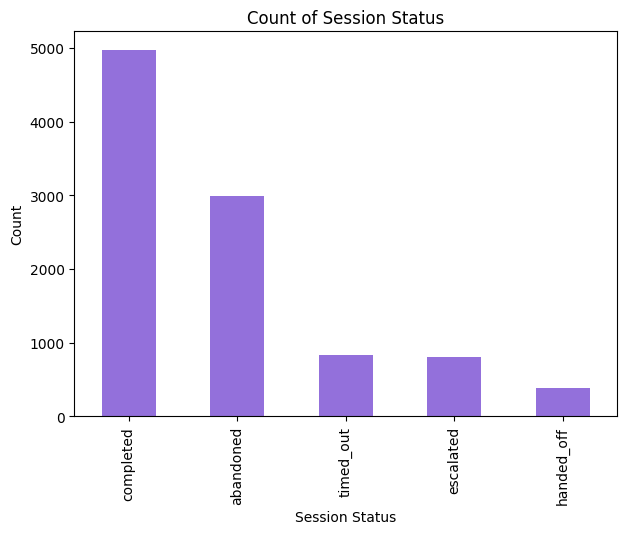

In [23]:
# Visualization of Session Status by using Bar plot
plt.figure(figsize=(7,5))
df_Cat['Session Status'].value_counts().plot(kind = 'bar',color = 'mediumpurple')
plt.title('Count of Session Status')
plt.ylabel('Count')
plt.show()

**Interpretation of Session Status Counts**

The `value_counts()` output shows the number of conversations belonging to each session status category in the dataset:

- **Completed:** 4,977 conversations  
- **Abandoned:** 2,990 conversations  
- **Timed_out:** 833 conversations  
- **Escalated:** 809 conversations  
- **Handed_off:** 391 conversations  

The bar chart visualizes this distribution, and the heights of the bars confirm the frequency of each session outcome.

**Key Insights**
- The majority of conversations were **successfully completed**, indicating strong system performance for a large portion of users.
- **Abandoned sessions** form the second-largest group, showing a significant number of users dropping off before completing their interaction. This is a key area for further investigation.
- The **Timed_out** category (833 sessions) suggests that users often became inactive or did not respond within system-defined time limits.
- **Escalated sessions** (809) indicate situations where automation could not resolve user issues, requiring human intervention.
- **Handed_off sessions** (391) represent controlled transfers between automated flows and support processes.

**Overall**
- The dataset reflects a healthy volume of completed interactions but also highlights noticeable drop-off and escalation behavior.
- Understanding why users abandon or time out during sessions will be critical for improving automation quality, user engagement, and flow efficiency.


In [24]:
# Check the columns names 
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

##### Channel

In [25]:
# Check the values counts of Channel
df_Cat['Channel'].value_counts()

Channel
web_chat    5076
whatsapp    2511
bot         1939
sms          474
Name: count, dtype: int64

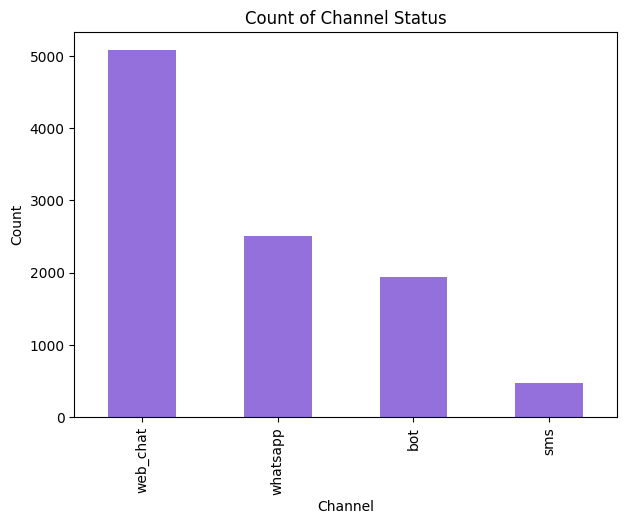

In [26]:
# Visualization of Channel by using Bar plot
plt.figure(figsize=(7,5))
df_Cat['Channel'].value_counts().plot(kind = 'bar',color = 'mediumpurple')
plt.title('Count of Channel Status')
plt.ylabel('Count')
plt.show()

**Interpretation of Channel Channel**

The `value_counts()` output shows the number of conversations conducted through each communication channel in the dataset:

- **web_chat:** 5,076 conversations  
- **whatsapp:** 2,511 conversations  
- **bot:** 1,939 conversations  
- **sms:** 474 conversations  

The bar chart visualizes this distribution clearly, showing the relative usage of each channel.

**Key Insights**
- The **web_chat** channel is the most frequently used, contributing more than half of all interactions. This suggests that users prefer real-time chat interfaces for support or queries.
- **WhatsApp** is the second most-used channel with 2,511 conversations, indicating strong adoption of mobile messaging for customer support.
- The **bot** channel records 1,939 automated interactions, showing a notable volume of customers engaging directly with conversational AI.
- The **sms** channel has the lowest count (474), indicating limited usage—possibly due to lower accessibility, fewer features, or user preference for richer messaging platforms.

**Overall**
- The dataset demonstrates that **web-based chat and WhatsApp are the dominant engagement channels**, while bot interactions still form a significant portion of traffic.
- The sharp drop in SMS usage highlights a clear shift toward digital, interactive, and convenient messaging platforms.
- Understanding performance differences across these channels will be important for improving user experience and optimizing support strategies.


In [27]:
# Check the columns names 
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

##### Dropoff Reason Code

In [28]:
# Check the counts of Dropoff Reason Code 
df_Cat['Dropoff Reason Code'].value_counts()

Dropoff Reason Code
CLIENT_ERROR        7688
FALLBACK             511
LONG_BOT_LATENCY     466
TIMEOUT              460
LONG_QUEUE_WAIT      443
USER_LEFT            432
Name: count, dtype: int64

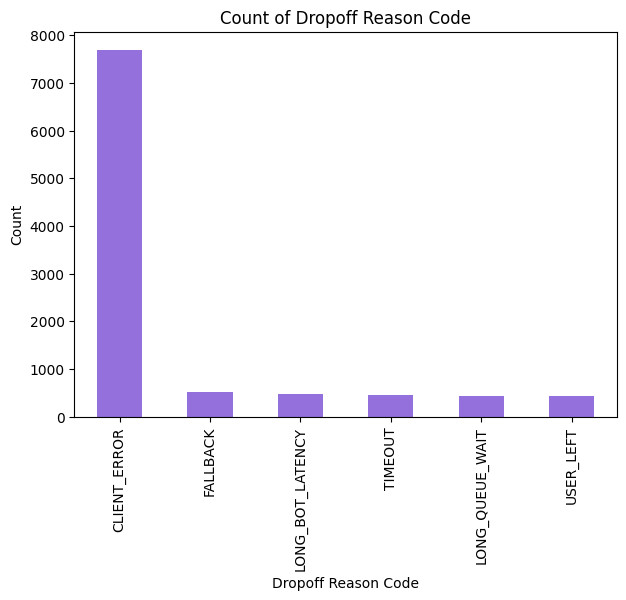

In [29]:
# Visualization of Dropoff Reason Code by Using Bar plot
plt.figure(figsize=(7,5))
df_Cat['Dropoff Reason Code'].value_counts().plot(kind = 'bar',color = 'mediumpurple')
plt.title('Count of Dropoff Reason Code')
plt.ylabel('Count')
plt.show()

**Interpretation of Dropoff Reason Code Counts**

The `value_counts()` output shows the number of conversations that were abandoned due to each specific drop-off reason in the dataset:

- **CLIENT_ERROR:** 7,688 conversations  
- **FALLBACK:** 511 conversations  
- **LONG_BOT_LATENCY:** 466 conversations  
- **TIMEOUT:** 460 conversations  
- **LONG_QUEUE_WAIT:** 443 conversations  
- **USER_LEFT:** 432 conversations  

The bar chart visualizes how frequently each drop-off reason occurred, with a clear dominance of client-side issues.

**Key Insights**
- **CLIENT_ERROR** is the leading cause of conversation drop-offs by a large margin. With 7,688 occurrences, this indicates significant technical or browser-side failures affecting user experience.
- **FALLBACK**, **LONG_BOT_LATENCY**, and **TIMEOUT** collectively show several hundred drop-offs. These issues point to challenges in NLU understanding, bot performance, or system responsiveness.
- **LONG_QUEUE_WAIT** suggests that some users dropped off due to long waiting times when attempting to reach a human agent.
- **USER_LEFT** captures natural user abandonment unrelated to system errors, but its lower count indicates that most drop-offs are driven by technical or performance-related issues rather than user behavior.

**Overall**
- The distribution highlights that **system-side or client-side issues are the primary reasons for user abandonment**, overshadowing behavioral or intent-related causes.
- Addressing CLIENT_ERROR should be the top priority, followed by improving bot comprehension, reducing latency, and optimizing escalation wait times.
- Understanding the specific failure points behind each error category will be crucial for reducing drop-offs and improving the end-to-end user experience.


In [30]:
# Check the columns names 
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

##### Initial Intent

In [31]:
# Check the Initial Intent values counts
df_Cat['Initial Intent'].value_counts()

Initial Intent
product_info      1957
greeting          1524
billing_query     1513
order_status      1506
complaint         1470
password_reset    1024
return_request    1006
Name: count, dtype: int64

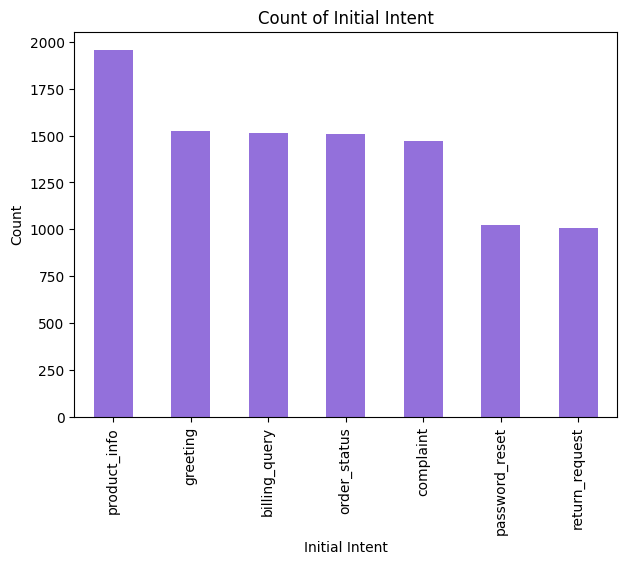

In [32]:
# Visualization of Initial Intent by using Bar plot
plt.figure(figsize=(7,5))
df_Cat['Initial Intent'].value_counts().plot(kind = 'bar',color = 'mediumpurple')
plt.title('Count of Initial Intent')
plt.ylabel('Count')
plt.show()

**Interpretation of Initial Intent Counts**

The `value_counts()` output shows how many conversations began with each type of user intent in the dataset:

- **product_info:** 1,957 conversations  
- **greeting:** 1,524 conversations  
- **billing_query:** 1,513 conversations  
- **order_status:** 1,506 conversations  
- **complaint:** 1,470 conversations  
- **password_reset:** 1,024 conversations  
- **return_request:** 1,006 conversations  

The bar chart provides a visual summary of these counts, displaying the relative frequency with which each intent initiates a session.

**Key Insights**
- **Product Information** is the most common initial intent, indicating that users frequently start conversations to learn more about products or offerings.
- **Greeting**, **Billing Query**, and **Order Status** appear in nearly equal proportions, suggesting these are core support use cases with consistent demand.
- **Complaint** is also a strong category, highlighting that a significant number of users reach out due to dissatisfaction or issues requiring support.
- **Password Reset** and **Return Request** have lower counts but still represent meaningful functional interactions that require efficient automation.

**Overall**
- The distribution reflects a healthy diversity in user queries, with both informational and issue-driven intents well represented.
- High volumes across multiple intent categories imply that the system needs robust NLP and well-designed flows to handle varied customer requests.
- Insights from this analysis can help prioritize optimization efforts for the most frequent intents, ensuring that critical paths like product information, billing queries, and complaints deliver smooth and accurate conversational experiences.


In [33]:
# Check the columns names 
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

##### Geo Country

In [34]:
# Check the Value counts of Geo Country 
df_Cat['Geo Country'].value_counts()

Geo Country
US    1923
IN    1810
GB    1166
ZA    1101
AU     808
DE     707
AE     670
SG     649
BR     610
CA     556
Name: count, dtype: int64

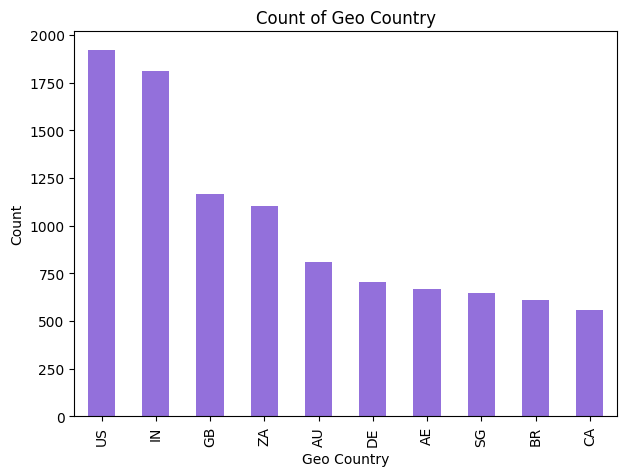

In [35]:
# Visualization of Geo Country by using Bar plot
plt.figure(figsize=(7,5))
df_Cat['Geo Country'].value_counts().plot(kind = 'bar',color = 'mediumpurple')
plt.title('Count of Geo Country')
plt.ylabel('Count')
plt.show()

**Interpretation of Geo Country Counts**

The `value_counts()` output highlights how conversations are distributed across different geographic regions in the dataset:

- **US:** 1,923 conversations  
- **IN (India):** 1,810 conversations  
- **GB (United Kingdom):** 1,166 conversations  
- **ZA (South Africa):** 1,101 conversations  
- **AU (Australia):** 808 conversations  
- **DE (Germany):** 707 conversations
- **AE (UAE):** 670 conversations  
- **SG (Singapore):** 649 conversations  
- **BR (Brazil):** 610 conversations  
- **CA (Canada):** 556 conversations  

The bar chart visually confirms these counts, showing strong usage from a diverse set of global regions.

**Key Insights**
- The **United States** has the highest conversation volume, indicating a large and active user base.
- **India** closely follows, suggesting strong adoption and high engagement from this market.
- Countries like **GB**, **ZA**, and **AU** also show substantial activity, reflecting global distribution rather than region-specific usage.
- Lower-volume countries such as **SG**, **BR**, and **CA** still contribute meaningfully, showing that customer interactions occur across multiple continents.
- The distribution indicates that users from both developed and emerging markets engage heavily with the platform, supporting diverse geographic needs.

**Overall**
- The dataset shows a **broad global footprint**, with heavy participation from North America, Asia, Europe, and Africa.
- This geographic spread suggests the need for localization, timezone-aware support, and regional performance optimization.
- Insights from this distribution can guide decisions on scaling infrastructure, improving country-specific experiences, and tailoring conversational flows to regional user behavior.


In [36]:
# Check the columns names 
df_Cat.columns

Index(['Conversation ID', 'User ID', 'Anonymous User ID', 'Account ID',
       'Start TS', 'End TS', 'Channel', 'Session Status', 'Abandonment TS',
       'Abandonment Turn', 'Abandonment Flow Node', 'Dropoff Reason Code',
       'Initial Intent', 'Top Intent', 'Flow ID', 'Flow Version',
       'Widget Version', 'Device Type', 'Browser', 'Geo Country',
       'CSAT Rating', 'Ingestion TS'],
      dtype='object')

##### Device Type

In [37]:
# Check the Value counts of Device Type
df_Cat['Device Type'].value_counts()

Device Type
desktop    5071
mobile     4432
tablet      497
Name: count, dtype: int64

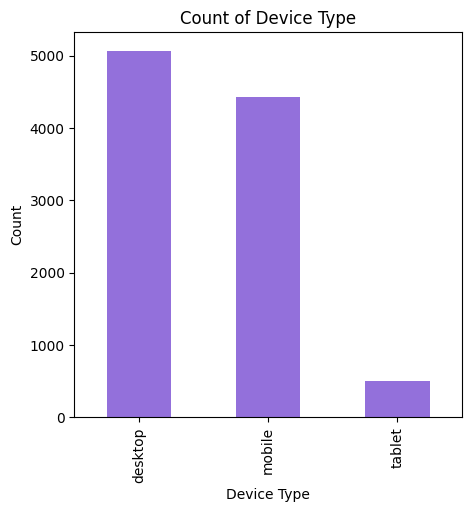

In [38]:
# Visualization of Device Type by using Bar plot
plt.figure(figsize=(5,5))
df_Cat['Device Type'].value_counts().plot(kind = 'bar',color = 'mediumpurple')
plt.title('Count of Device Type')
plt.ylabel('Count')
plt.show()

**Interpretation of Device Type Counts**

The `value_counts()` output shows how many conversations were initiated from each device type in the dataset:

- **desktop:** 5,071 conversations  
- **mobile:** 4,432 conversations  
- **tablet:** 497 conversations  

The bar chart clearly visualizes this distribution, highlighting the dominant devices used by users during their interactions.

**Key Insights**
- **Desktop** users make up the largest share of conversations, indicating that a significant portion of interactions occur through web-based interfaces, likely in professional, workplace, or home settings.
- **Mobile** usage is also very high, with 4,432 conversations. This reflects the increasing trend of users accessing customer support or automated chat services on-the-go.
- **Tablet** has the lowest interaction count (497), which is expected due to its smaller global user base compared to desktop and mobile.
- The desktop–mobile ratio suggests that both platforms are important, and optimizing user experience across these device types is crucial.
- Mobile usage being nearly close to desktop shows strong adoption of conversational services on handheld devices.

**Overall**
- The dataset demonstrates a healthy mix of desktop and mobile usage, confirming that users engage with the platform across multiple device types.
- Ensuring responsive design, fast load times, and device-friendly UI elements will be essential for maintaining high-quality user experience.
- The lower tablet usage suggests it is a secondary channel, but still valuable to support for completeness and inclusivity.


#### Univariate Analysis on Numerical Columns

In [39]:
df_Num.columns

Index(['Total Turns', 'User Message Count', 'Bot Message Count',
       'Avg Bot Latency (ms)', 'Fallback Count', 'Top Intent Confidence',
       'Widget Load (ms)', 'Client Error Count',
       'Predicted Abandon Probability'],
      dtype='object')

##### Total Turns

In [40]:
# Find the Minimum of Total Turns
df_Num['Total Turns'].min()

np.int64(1)

In [41]:
# Find the Maximum of Total Turns
df_Num['Total Turns'].max()

np.int64(18)

In [42]:
# Find the Average of Total Turns
df_Num['Total Turns'].mean()

np.float64(7.0031)

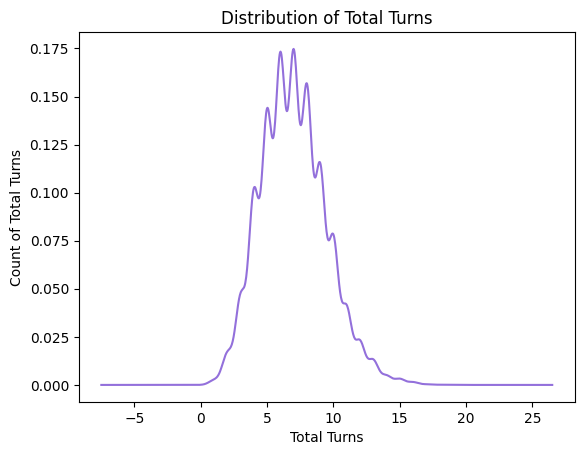

In [43]:
# Visualization of Total Turns by using KDE Plot
df_Num['Total Turns'].plot(kind='kde',color='mediumpurple')
plt.title('Distribution of Total Turns')
plt.xlabel('Total Turns')
plt.ylabel('Count of Total Turns')
plt.show()


**Interpretation of Total Turns Distribution**

The descriptive statistics and KDE plot reveal how many message exchanges occur in a typical conversation. The minimum number of turns recorded is **1**, the maximum is **18**, and the average (mean) number of turns is approximately **7.00**. This indicates that most conversations involve a moderate level of back-and-forth interaction between the user and the system.

The KDE curve shows a smooth, bell-shaped distribution, suggesting that Total Turns follow a pattern close to a normal distribution. The highest density lies between **5 and 10 turns**, indicating that most sessions fall within this range. Very short conversations (1–2 turns) and very long ones (15+ turns) are less common, forming the thinner tails of the curve.

**Key Insights**
- The majority of conversations require around **5 to 10 message exchanges**, reflecting typical user engagement levels and system responses.
- Extremely short sessions may indicate quick resolutions or abrupt exits, while very long sessions may suggest complex issues or inefficient bot handling.
- The relatively symmetric distribution suggests consistent conversational behavior across users without extreme deviations.

**Overall**
- The Total Turns metric demonstrates that users generally engage in medium-length interactions with the system.
- This information is valuable for understanding average workload, designing optimized conversation flows, and identifying outliers that may require deeper investigation.


In [44]:
df_Num.columns

Index(['Total Turns', 'User Message Count', 'Bot Message Count',
       'Avg Bot Latency (ms)', 'Fallback Count', 'Top Intent Confidence',
       'Widget Load (ms)', 'Client Error Count',
       'Predicted Abandon Probability'],
      dtype='object')

##### User Message Count

In [45]:
# Find the Minimum of User Message Counts
df_Num['User Message Count'].min()

np.int64(1)

In [46]:
# Find the Maximum of User Message Counts
df_Num['User Message Count'].max()

np.int64(14)

In [47]:
# Find the Average of User Message Counts
df_Num['User Message Count'].mean()

np.float64(3.0212)

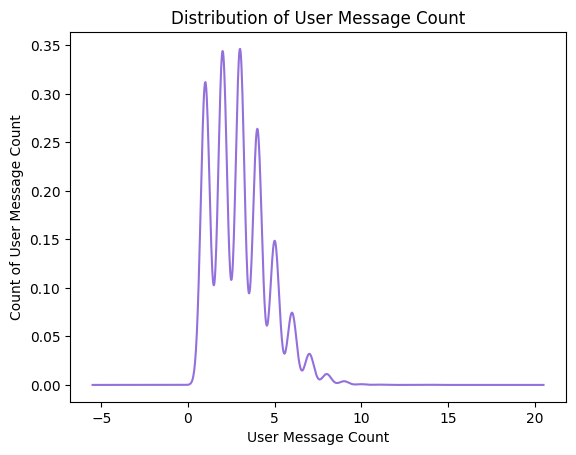

In [48]:
# Visualization of User Message Count by using KDE Plot
df_Num['User Message Count'].plot(kind='kde',color = 'mediumpurple')
plt.title('Distribution of User Message Count')
plt.xlabel('User Message Count')
plt.ylabel('Count of User Message Count')
plt.show()

**Interpretation of User Message Count Distribution**

The summary statistics show that users send a minimum of **1** message and a maximum of **14** messages during a conversation. The average (mean) number of user messages is approximately **3.02**, which indicates that most users interact minimally with the system before their query is resolved or the session ends.

The KDE plot reveals a sharply peaked distribution, with the highest density between **1 and 5 messages**. This suggests that the majority of users send only a few messages, resulting in short and focused interactions. The tails of the distribution are thin, meaning that very long user conversations (above 8–10 messages) are relatively rare.

**Key Insights**
- Most users engage in **brief conversations**, typically sending between **1 and 5 messages**.
- The low average message count suggests that the system resolves a large portion of queries efficiently or that users drop off early.
- Higher message counts (8+ messages) may indicate complex problems, misunderstandings between the user and bot, or repeated fallback scenarios.
- The concentrated peak reflects consistent user behavior and a predictable interaction pattern.

**Overall**
- The User Message Count metric shows that user engagement is generally **short and concise**, which is beneficial for system load and efficiency.
- Studying outliers with high message counts may provide insights into intents or flows that need refinement, while the common short interactions suggest a relatively streamlined conversational experience for most users.


In [49]:
df_Num.columns

Index(['Total Turns', 'User Message Count', 'Bot Message Count',
       'Avg Bot Latency (ms)', 'Fallback Count', 'Top Intent Confidence',
       'Widget Load (ms)', 'Client Error Count',
       'Predicted Abandon Probability'],
      dtype='object')

##### Avg Bot Latency (ms)

In [50]:
# Find the Minimum of Avg Bot Latency (ms)
df_Num['Avg Bot Latency (ms)'].min()

np.float64(50.0)

In [51]:
# Find the Maximum of Avg Bot Latency (ms)
df_Num['Avg Bot Latency (ms)'].max()

np.float64(1116.4)

In [52]:
# Find the Average of Avg Bot Latency (ms)
df_Num['Avg Bot Latency (ms)'].mean()

np.float64(268.51961)

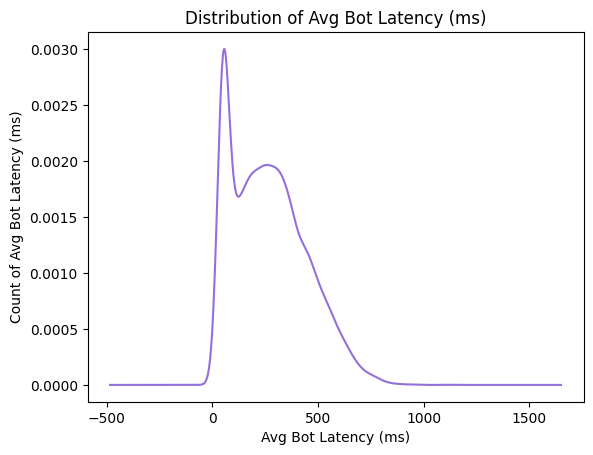

In [53]:
# Visualization of Avg Bot Latency (ms) Count by using KDE Plot
df_Num['Avg Bot Latency (ms)'].plot(kind='kde',color = 'mediumpurple')
plt.title('Distribution of Avg Bot Latency (ms)')
plt.xlabel('Avg Bot Latency (ms)')
plt.ylabel('Count of Avg Bot Latency (ms)')
plt.show()

**Interpretation of Avg Bot Latency (ms) Distribution**

The descriptive statistics show that the minimum average bot latency is **50 ms**, while the maximum reaches **1,116.4 ms**, indicating that bot response time varies significantly across conversations. The mean latency is approximately **268.52 ms**, suggesting that on average, the bot responds within a quarter of a second—generally acceptable for conversational experiences.

The KDE plot demonstrates a right-skewed distribution, where most latency values cluster toward the lower end of the range. The highest density appears between **100 ms and 400 ms**, indicating that typical bot responses fall within this relatively efficient latency window. The tail extending beyond **800 ms** highlights a smaller number of conversations with much slower response times.

**Key Insights**
- A majority of bot responses occur below **400 ms**, reflecting good system performance for most interactions.
- The presence of higher latency values (e.g., above **800 ms**) suggests potential issues such as network delays, heavy load, API wait times, or inefficient backend processing.
- The mean value being close to the peak range indicates stable performance, but the long tail points to opportunities for optimization in certain cases.
- Faster response times generally correlate with better user satisfaction and lower drop-off rates, making this metric especially important for conversational experience.

**Overall**
- The distribution shows that the system typically delivers **fast and reliable** responses, but occasional spikes in latency may contribute to user frustration or delays in conversation flow.
- Investigating sessions with extremely high latency could help identify system bottlenecks and areas for performance improvement, ultimately enhancing overall user experience and reducing abandonment rates.


In [54]:
df_Num.columns

Index(['Total Turns', 'User Message Count', 'Bot Message Count',
       'Avg Bot Latency (ms)', 'Fallback Count', 'Top Intent Confidence',
       'Widget Load (ms)', 'Client Error Count',
       'Predicted Abandon Probability'],
      dtype='object')

##### Fallback Count

In [55]:
# Find the Minimum of Fallback Count
df_Num['Fallback Count'].min()

np.int64(0)

In [56]:
# Find the Minimum of Fallback Count
df_Num['Fallback Count'].max()

np.int64(4)

In [57]:
# Find the Average of Fallback Count
df_Num['Fallback Count'].mean()

np.float64(0.3776)

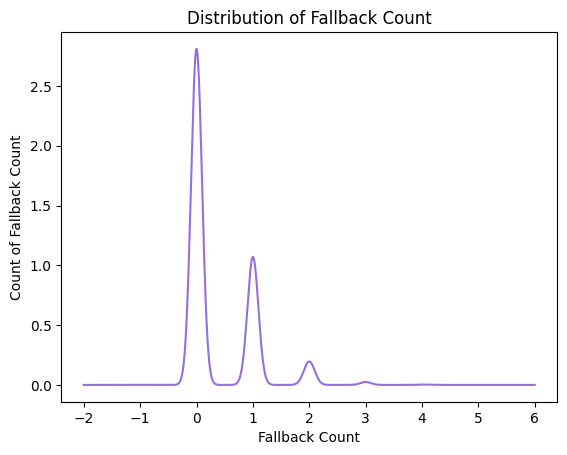

In [58]:
# Visualization of Fallback Count by using KDE Plot
df_Num['Fallback Count'].plot(kind='kde',color = 'mediumpurple')
plt.title('Distribution of Fallback Count')
plt.xlabel('Fallback Count')
plt.ylabel('Count of Fallback Count')
plt.show()

**Interpretation of Fallback Count Distribution**

The descriptive statistics indicate that the minimum fallback count is **0**, while the maximum is **4**. The average fallback count is approximately **0.38**, meaning that in most conversations, the bot rarely encounters situations where it fails to understand the user's intent.

The KDE plot shows a highly skewed distribution, with a sharp peak at **0 fallbacks**, indicating that the vast majority of conversations proceed without any misunderstanding by the bot. There is a noticeably smaller density around **1 fallback**, and very minimal density at **2 or more fallbacks**, reflecting that repeated misinterpretations are relatively uncommon.

**Key Insights**
- Most conversations experience **zero fallback events**, suggesting that the bot's intent recognition and language understanding capabilities perform well for the majority of users.
- The presence of conversations with **1 fallback** or occasionally more indicates scenarios where user queries may be unclear, phrased unexpectedly, or outside the bot’s trained intent set.
- Conversations with **3 or 4 fallbacks** are rare but important to investigate, as repeated failures often lead to frustration, abandonment, or escalation.
- A low overall fallback average (0.38) is a positive indicator of **strong NLU performance**.

**Overall**
- The system demonstrates **high effectiveness in intent detection**, with fallbacks occurring infrequently.
- Although the majority of user messages are successfully interpreted, examining outlier conversations with multiple fallbacks can highlight improvement opportunities for training data, intent coverage, or response design.
- Reducing fallback occurrences even further can improve user satisfaction, reduce drop-offs, and enhance overall conversational flow quality.


In [59]:
df_Num.columns

Index(['Total Turns', 'User Message Count', 'Bot Message Count',
       'Avg Bot Latency (ms)', 'Fallback Count', 'Top Intent Confidence',
       'Widget Load (ms)', 'Client Error Count',
       'Predicted Abandon Probability'],
      dtype='object')

##### Predicted Abandon Probability

In [60]:
# Find the Minimum of Predicted Abandon Probability
df_Num['Predicted Abandon Probability'].min()

np.float64(0.002)

In [61]:
# Find the Maximum of Predicted Abandon Probability
df_Num['Predicted Abandon Probability'].max()

np.float64(0.934)

In [62]:
# Find the Average of Predicted Abandon Probability
df_Num['Predicted Abandon Probability'].mean()

np.float64(0.2849712)

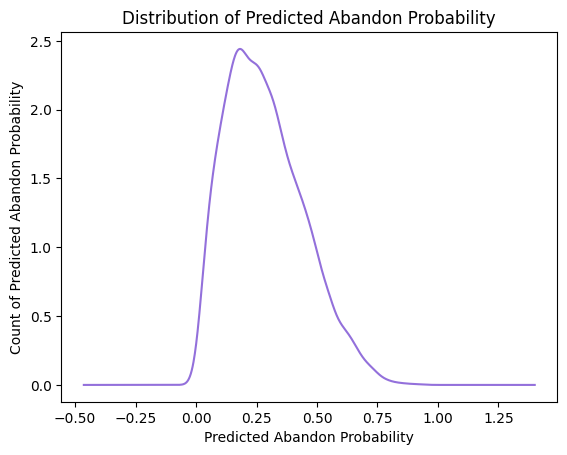

In [63]:
# Visualization of Predicted Abandon Probability by using KDE Plot
df_Num['Predicted Abandon Probability'].plot(kind='kde',color = 'mediumpurple')
plt.title('Distribution of Predicted Abandon Probability')
plt.xlabel('Predicted Abandon Probability')
plt.ylabel('Count of Predicted Abandon Probability')
plt.show()

**Interpretation of Predicted Abandon Probability Distribution**

The descriptive statistics show that the minimum predicted abandon probability is **0.002**, and the maximum reaches **0.934**. The mean predicted probability is approximately **0.285**, which indicates that, on average, sessions have a relatively low likelihood of abandonment according to the model.

The KDE plot displays a smooth, right-skewed distribution. The highest density appears between **0.15 and 0.40**, showing that most sessions fall within a low to moderate abandonment risk. As the probability increases beyond **0.50**, the density declines sharply, indicating far fewer conversations with a high likelihood of abandonment.

**Key Insights**
- Most conversations have a **low predicted abandonment probability**, suggesting stable user engagement under typical conditions.
- The smooth rise and gradual decline in the KDE curve highlights a natural distribution of abandonment risk, rather than abrupt concentration of high-risk cases.
- Conversations with probabilities above **0.60** form a small tail, indicating scenarios where the system detected signals strongly associated with possible drop-off (e.g., high latency, fallbacks, long inactive periods).
- The overall shape shows that the model is sensitive enough to differentiate between normal and at-risk sessions while maintaining realistic probability spread.

**Overall**
- The predicted abandonment probability metric provides valuable insight into **user engagement health** across interactions.
- With the majority of sessions classified as low-risk, the system appears to perform well for most users.
- High-probability outliers are crucial to investigate, as they may reveal conditions that frequently lead to drop-offs—offering opportunities for targeted improvements in flow design, bot performance, or user experience.


### Bivariate Analysis

#### Bivariate Analysis on Numerical - Numerical Columns 

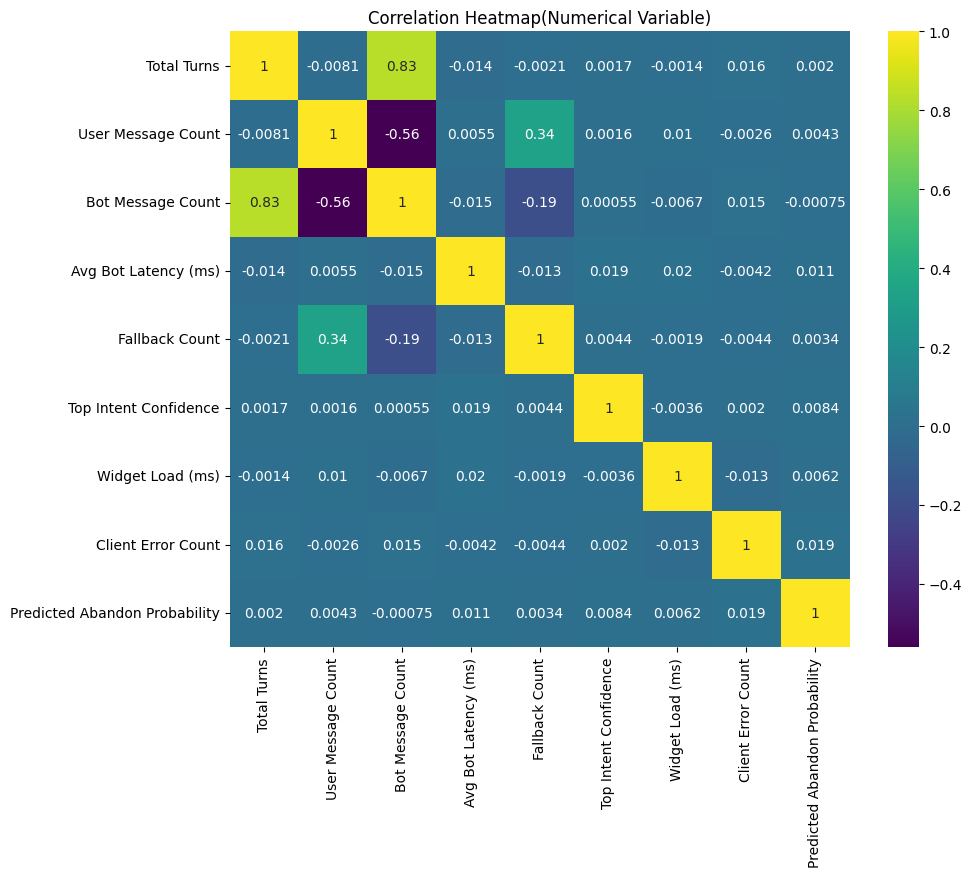

In [64]:
# Correlation Efficient
corr = df_Num.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True, cmap='viridis')
plt.title('Correlation Heatmap(Numerical Variable)')
plt.show()

**Interpretation of Correlation Heatmap (Numerical Variables)**

The correlation heatmap summarizes the strength and direction of relationships among the numerical features in the dataset. Overall, the numerical variables show **very weak correlations**, indicating that most metrics behave independently rather than influencing one another strongly.

**Strongest Positive Correlation**
- **Total Turns ↔ Bot Message Count (0.83)**  
  This is the only strong positive relationship in the dataset. It indicates that as the total number of turns in a conversation increases, the number of bot messages also increases. This is expected because longer conversations naturally involve more bot responses.

**Moderate Correlations**
- **User Message Count ↔ Fallback Count (0.34)**  
  This shows that when users send more messages, the chance of encountering fallbacks slightly increases. Higher user effort may lead to more misunderstandings by the bot.
  
- **User Message Count ↔ Bot Message Count (-0.56)**  
  This moderate negative correlation suggests that when users send more messages, bot messages decrease slightly. This may indicate that longer user-driven conversations sometimes occur when the bot struggles to provide sufficient responses.

**Weak or Near-Zero Correlations**
All other pairs exhibit correlations close to **0**, meaning:
- **Avg Bot Latency**,  
- **Top Intent Confidence**,  
- **Widget Load Time**,  
- **Client Error Count**,  
- **Predicted Abandon Probability**  
do not show meaningful linear relationships with other numerical variables.

This implies that system performance metrics, confidence scores, and abandonment risk behave independently and are not strongly influenced by basic conversation metrics like turns or message counts.

**No Strong Negative Correlations**
There are **no correlations ≤ -0.7**, indicating that none of the numerical variables move in strongly opposite directions. The dataset does not contain pairs where one variable significantly decreases when another increases.

**Overall Interpretation**
- The dataset shows one major strong correlation: **longer conversations naturally involve more bot messages**.  
- Moderate relationships reflect user effort affecting fallbacks or message balance.  
- Most system performance metrics (latency, load time, errors) and predictive metrics (abandon probability) remain largely independent of conversation length or message counts.  
- The absence of strong negative correlations suggests that the numerical variables do not have conflicting or inverse behavioral patterns.

This heatmap confirms that the numerical features contribute **unique, non-redundant information**, making them suitable for predictive modeling and deeper multivariate analysis.


##### Bot Message Count vs Total Turns

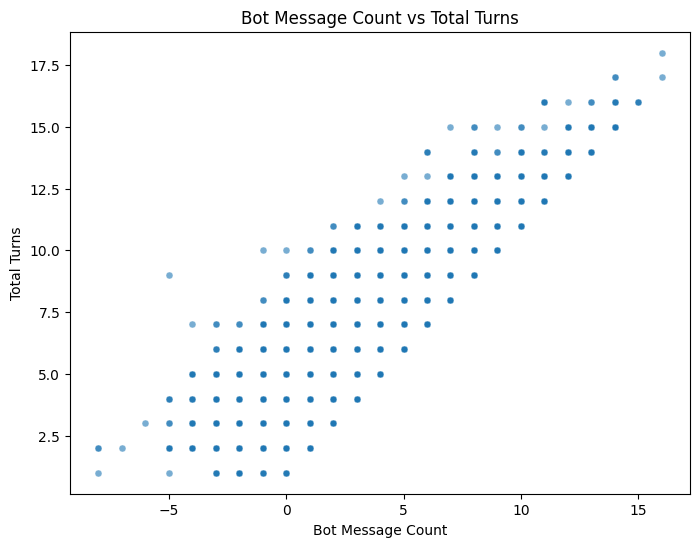

In [65]:
# Bot Message Count vs Total Turns
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_Num, x = 'Bot Message Count',y = 'Total Turns',alpha=0.6,s=25)
plt.title('Bot Message Count vs Total Turns')
plt.xlabel('Bot Message Count')
plt.ylabel('Total Turns')
plt.show()

**Interpretation of Bot Message Count vs Total Turns**

The scatter plot illustrates the relationship between the **Bot Message Count** and the **Total Turns** in each conversation. Each point represents a single conversation, showing how many messages the bot sent compared to the total number of exchanges (user + bot).

**Key Insights**
- There is a **clear positive linear relationship** between Bot Message Count and Total Turns. As the number of bot messages increases, the total turns in the conversation also increase.
- This pattern indicates that **longer conversations consistently require more bot responses**, which is expected because bot replies make up a significant portion of total conversational turns.
- The points are well aligned diagonally, showing that Total Turns are strongly dependent on the number of bot messages. This aligns with the high correlation value (**0.83**) found earlier in the heatmap.
- Conversations with low bot message counts (1–3) correspond to very short interactions, while higher bot message counts (10–15) align with long, multi-step conversations.
- There is no evidence of outliers or unusual patterns, suggesting that the interaction between users and the bot is consistent and predictable across sessions.

**Overall**
- The scatter plot confirms that **Bot Message Count is a major contributor to Total Turns**.
- This strong positive relationship indicates efficient bot engagement—more messages from the bot naturally occur in longer conversations.
- This insight is important for workload analysis, flow optimization, and understanding how system-driven responses shape conversation length.


#### Bivariate Analysis on Categorical-Numerical Features

##### Session Status vs Total Turns

In [66]:
# Calculate the Average Session Status for each Total Turns
df_conversation_analytics.groupby('Session Status')['Total Turns'].mean()

Session Status
abandoned     7.032107
completed     6.991561
escalated     6.922126
handed_off    7.140665
timed_out     6.981993
Name: Total Turns, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_9400\3050573197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = session_status_df, x = 'Session Status', y = 'Total Turns', palette = 'pastel')


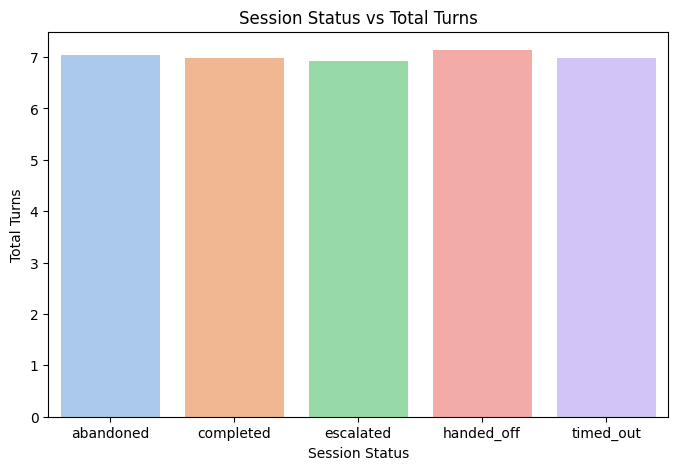

In [67]:
# Visulaization of Bar Plot: Session Status vs Total Turns

# Calculate mean of Total Turns for Session Status 
session_status_df = df_conversation_analytics.groupby('Session Status')['Total Turns'].mean().reset_index()

# plotting
plt.figure(figsize=(8,5))
sns.barplot(data = session_status_df, x = 'Session Status', y = 'Total Turns', palette = 'pastel')
plt.title('Session Status vs Total Turns')
plt.xlabel('Session Status')
plt.ylabel('Total Turns')
plt.show()

**Interpretation of Session Status vs Total Turns**

The analysis shows how the average number of conversation turns varies across different session outcomes. The mean Total Turns for each Session Status category are:

- **handed_off:** 7.14  
- **abandoned:** 7.03  
- **completed:** 6.99  
- **timed_out:** 6.98  
- **escalated:** 6.92  

The bar chart clearly illustrates that all session outcomes have **very similar average conversation lengths**, clustering around **7 total turns**. However, small but meaningful differences are observed.

**Key Insights**

- **Handed_off sessions have the highest number of turns (7.14)**  
  These conversations tend to be longer because the system attempts multiple steps before transferring to a human agent, resulting in additional exchanges.

- **Abandoned sessions also show higher-than-average turns (7.03)**  
  This suggests that users often leave after engaging for several steps—possibly due to inadequate responses, confusion, or slow progress.

- **Completed sessions fall slightly below the abandoned and handed_off categories (6.99)**  
  Completed sessions require fewer turns compared to problematic outcomes, indicating more efficient interaction.

- **Timed_out sessions (6.98) and Escalated sessions (6.92) have the lowest turn counts**  
  These cases likely end earlier because:
  - Users become inactive quickly (timed_out), or  
  - The bot triggers escalation without requiring many turns.

**Overall Interpretation**

- The dataset shows a **consistent average conversation length around 7 turns** across all outcomes.
- Higher turns are associated with **handoffs and abandonment**, indicating potential friction or unresolved user needs.
- Lower turns in **escalated** or **timed_out** sessions suggest early disengagement or quick escalation pathways.
- This pattern highlights that conversation length alone does not determine success, but variations help reveal **which session outcomes require more effort** from both the user and the bot.

This insight is valuable for improving conversation design, reducing unnecessary steps, and lowering abandonment/hand-off rates.


##### Channel vs Bot Message Count

In [68]:
# Calculate the Average Bot Message Count for each Channel
df_conversation_analytics.groupby('Channel')['Bot Message Count'].mean()

Channel
bot         3.922125
sms         3.972574
web_chat    3.957447
whatsapp    4.079251
Name: Bot Message Count, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_9400\3347852215.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = channel_msg_df, x = 'Channel', y = 'Bot Message Count', palette = 'pastel')


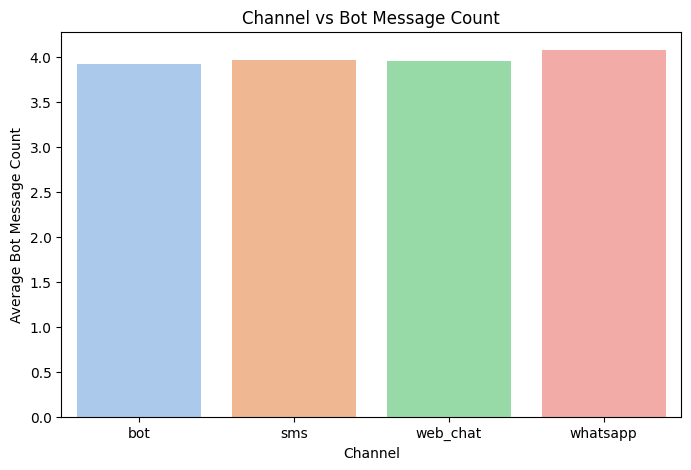

In [69]:
# Create a new dataframe for plotting
channel_msg_df = df_conversation_analytics.groupby('Channel')['Bot Message Count'].mean().reset_index()

# Visualization: Channel vs Bot Message Count
plt.figure(figsize=(8,5))
sns.barplot(data = channel_msg_df, x = 'Channel', y = 'Bot Message Count', palette = 'pastel')
plt.title('Channel vs Bot Message Count')
plt.xlabel('Channel')
plt.ylabel('Average Bot Message Count')
plt.show()

**Interpretation of Channel vs Bot Message Count**

The analysis shows how the average number of bot messages varies across different communication channels.  
The mean Bot Message Count for each channel is:

- **whatsapp:** 4.08  
- **sms:** 3.97  
- **web_chat:** 3.96  
- **bot:** 3.92  

The bar chart shows that all channels have **very similar average bot message counts**, clustered around **4 messages**, with slight variations across channels.

**Key Insights**

- **WhatsApp sessions have the highest bot message count (4.08)**  
  This indicates that WhatsApp users tend to engage in slightly longer back-and-forth interactions. Mobile-based chat may encourage follow-up queries, leading to more bot responses.

- **SMS sessions show the second-highest bot message count (3.97)**  
  Limited message space and shorter inputs may require the bot to send more clarifying instructions, increasing the bot message count.

- **Web_chat and bot-only interactions have similar values (3.92–3.96)**  
  These platforms seem to provide more structured interactions, allowing the bot to operate efficiently with fewer messages.

- **Differences across channels are minimal**  
  This suggests that the bot maintains a consistent interaction pattern regardless of platform, with minor variations due to user behavior differences.

**Overall Interpretation**

- The dataset reveals a stable bot communication pattern across all channels, averaging around **4 messages per conversation**.
- WhatsApp users engage the most with the bot, while bot-only and web chat channels remain more consistent and controlled.
- These patterns indicate that channel type slightly influences user behavior and bot response frequency, offering opportunities to optimize messaging strategies for each platform.


##### Initial Intent vs Total Turns

In [70]:
# Calculate the Average Total Turns for each Initial Intent
df_conversation_analytics.groupby('Initial Intent')['Total Turns'].mean()

Initial Intent
billing_query     6.988764
complaint         6.980952
greeting          7.047244
order_status      7.065073
password_reset    6.992188
product_info      6.972918
return_request    6.967197
Name: Total Turns, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_9400\1731572491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=intent_turns_df, x='Initial Intent', y='Total Turns', palette='pastel')


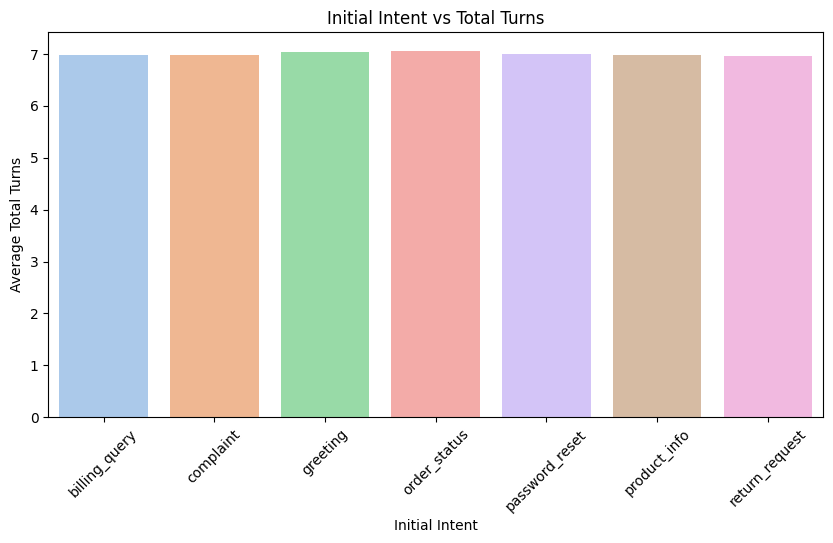

In [71]:
# Create a new dataframe for plotting
intent_turns_df = df_conversation_analytics.groupby('Initial Intent')['Total Turns'].mean().reset_index()

# Visualization: Initial Intent vs Total Turns
plt.figure(figsize=(10,5))
sns.barplot(data=intent_turns_df, x='Initial Intent', y='Total Turns', palette='pastel')
plt.title('Initial Intent vs Total Turns')
plt.xlabel('Initial Intent')
plt.ylabel('Average Total Turns')
plt.xticks(rotation=45)
plt.show()

**Interpretation of Initial Intent vs Total Turns**

The analysis shows how the average number of total conversation turns varies across different starting intents.  
The mean Total Turns for each Initial Intent category are:

- **order_status:** 7.07  
- **greeting:** 7.05  
- **password_reset:** 6.99  
- **billing_query:** 6.99  
- **complaint:** 6.98  
- **product_info:** 6.97  
- **return_request:** 6.96  

The bar chart highlights that all intents have **very similar conversation lengths**, centered around **7 total turns**, with slight differences depending on the intent type.

**Key Insights**

- **Order_status shows the highest number of turns (7.07)**  
  Order-related queries typically require verification steps, status checks, or additional clarification, resulting in more interactions.

- **Greeting sessions also show higher turns (7.05)**  
  These conversations often include an introductory exchange before the user expresses their actual need, adding extra steps.

- **Billing_query, complaint, and password_reset fall around the 6.98–6.99 range**  
  These intents follow predictable resolution patterns, allowing the bot to address them efficiently.

- **Product_info and return_request have the lowest turns (6.96–6.97)**  
  These queries are usually simpler and involve straightforward informational responses or guided steps.

**Overall Interpretation**

- Conversations across all intents maintain a **stable average length**, indicating well-structured and consistent conversation flows.
- More complex or multi-step intents, such as order_status and greeting, naturally lead to slightly longer interactions.
- Simpler intents achieve quicker resolution, helping reduce user effort.
- This pattern highlights well-balanced conversational design, where intent type slightly influences turn count, but overall consistency is maintained.


##### Dropoff Reason Code vs Bot Message Count

In [72]:
# Calculate the Average Bot Message Count for each Dropoff Reason Code
df_conversation_analytics.groupby('Dropoff Reason Code')['Bot Message Count'].mean()


Dropoff Reason Code
CLIENT_ERROR        3.981920
FALLBACK            3.585127
LONG_BOT_LATENCY    3.931330
LONG_QUEUE_WAIT     4.218962
TIMEOUT             4.247826
USER_LEFT           3.979167
Name: Bot Message Count, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_9400\2340136413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dropoff_msg_df, x='Dropoff Reason Code', y='Bot Message Count', palette='pastel')


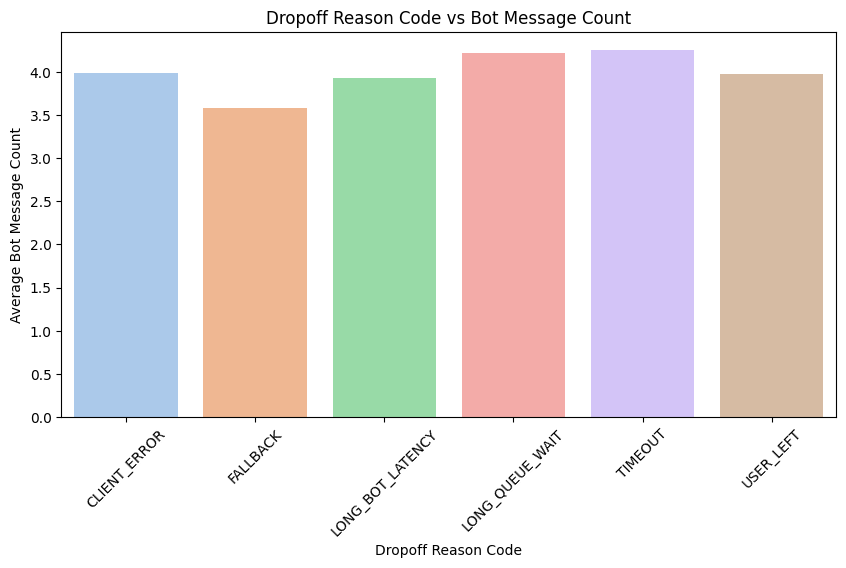

In [73]:
# Create a new dataframe for plotting
dropoff_msg_df = df_conversation_analytics.groupby('Dropoff Reason Code')['Bot Message Count'].mean().reset_index()

# Visualization: Dropoff Reason Code vs Bot Message Count
plt.figure(figsize=(10,5))
sns.barplot(data=dropoff_msg_df, x='Dropoff Reason Code', y='Bot Message Count', palette='pastel')
plt.title('Dropoff Reason Code vs Bot Message Count')
plt.xlabel('Dropoff Reason Code')
plt.ylabel('Average Bot Message Count')
plt.xticks(rotation=45)
plt.show()

**Interpretation of Dropoff Reason Code vs Bot Message Count**

The analysis shows how the average number of bot messages varies across different drop-off reasons.  
The mean Bot Message Count for each Dropoff Reason Code category is:

- **TIMEOUT:** 4.25  
- **LONG_QUEUE_WAIT:** 4.22  
- **CLIENT_ERROR:** 3.98  
- **USER_LEFT:** 3.98  
- **LONG_BOT_LATENCY:** 3.93  
- **FALLBACK:** 3.58  

The bar chart highlights that while most categories have bot message counts around **4 messages**, some drop-off types indicate higher bot activity than others.

**Key Insights**

- **Timeout sessions have the highest bot message count (4.25)**  
  This suggests the bot continued sending messages while waiting for user input, resulting in increased bot-driven interaction before the system timed out.

- **Long queue wait also shows high message count (4.22)**  
  Users waiting for human agent transfer may receive multiple automated prompts or status updates, increasing bot message frequency.

- **CLIENT_ERROR and USER_LEFT show similar averages (~3.98)**  
  These situations may end abruptly, but the bot still issues a few messages before the session terminates.

- **Long bot latency cases have moderately high turns (3.93)**  
  These may stem from slow system responses, causing extra bot retries or clarifications.

- **Fallback has the lowest message count (3.58)**  
  This indicates that fallback errors often occur early in the interaction, leading to shorter conversations before the user exits.

**Overall Interpretation**

- Drop-off categories tied to **waiting** or **system delays** (TIMEOUT, LONG_QUEUE_WAIT) show higher bot activity.
- Drop-offs triggered by errors or user exit (FALLBACK, USER_LEFT, CLIENT_ERROR) show relatively fewer messages.
- These patterns suggest that **system performance issues increase bot workload**, whereas **user-driven exits cut interactions short**.
- Understanding these distinctions helps target improvements to reduce drop-offs linked to long waiting periods or system delays.


##### Geo Country vs Total Turns

In [74]:
# Calculate the Average Total Turns for each Geo Country
df_conversation_analytics.groupby('Geo Country')['Total Turns'].mean()

Geo Country
AE    6.922388
AU    6.829208
BR    7.124590
CA    7.066547
DE    6.831683
GB    6.969125
IN    7.071271
SG    6.898305
US    7.091524
ZA    7.021798
Name: Total Turns, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_9400\949828465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=geo_turns_df, x='Geo Country', y='Total Turns', palette='pastel')


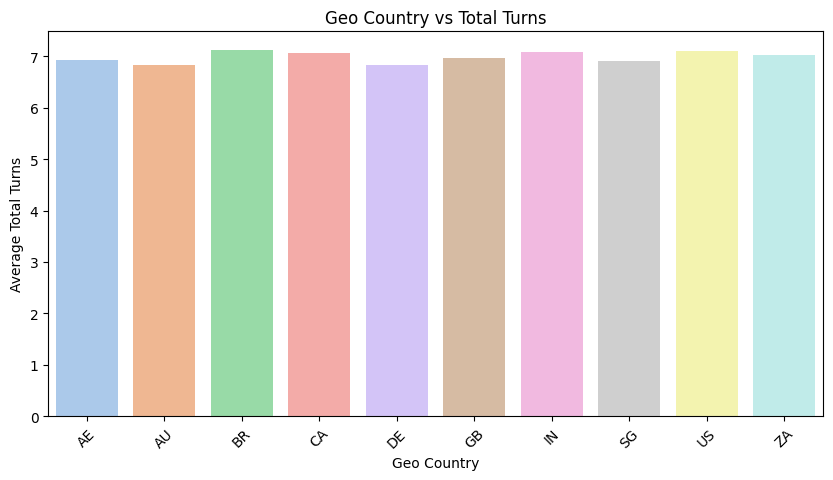

In [75]:
# Create a new dataframe for plotting
geo_turns_df = df_conversation_analytics.groupby('Geo Country')['Total Turns'].mean().reset_index()

# Visualization: Geo Country vs Total Turns
plt.figure(figsize=(10,5))
sns.barplot(data=geo_turns_df, x='Geo Country', y='Total Turns', palette='pastel')
plt.title('Geo Country vs Total Turns')
plt.xlabel('Geo Country')
plt.ylabel('Average Total Turns')
plt.xticks(rotation=45)
plt.show()

**Interpretation of Geo Country vs Total Turns**

The analysis shows how the average total number of conversation turns varies across different regions.  
The mean Total Turns for each Geo Country are:

- **BR:** 7.12  
- **US:** 7.09  
- **IN:** 7.07  
- **CA:** 7.07  
- **ZA:** 7.02  
- **GB:** 6.97  
- **AE:** 6.92  
- **SG:** 6.90  
- **DE:** 6.83  
- **AU:** 6.83  

The bar chart shows that while averages range between **6.8 and 7.1 turns**, certain countries demonstrate slightly higher engagement.

**Key Insights**

- **Brazil (7.12) shows the highest average total turns**  
  This suggests Brazilian users may ask more follow-up questions or require more clarification, leading to slightly longer conversations.

- **US and India (around 7.07–7.09) also show higher engagement**  
  These regions likely have diverse user queries or more complex intents, increasing total turns.

- **Canada and South Africa show upper-mid values (7.02–7.07)**  
  These interaction levels reflect balanced conversation structures.

- **Lower average turns in Australia and Germany (6.83)**  
  These regions may experience faster resolutions or shorter interactions due to clearer intent patterns or simpler use cases.

- **Singapore and UAE fall in the mid-range (6.9–6.92)**  
  These values indicate consistent, efficient interactions with minimal variation.

**Overall Interpretation**

- Average turn counts across all countries remain close to **7**, showing globally consistent conversation flows.
- Slight increases in regions like **Brazil, US, and India** suggest more active engagement or complex requirements.
- Lower averages in **Germany and Australia** may reflect more streamlined interactions.
- These insights can help tailor conversation design, improve regional performance, and enhance localized bot behavior.



### Multivariate Analysis 

#### Multivariate Analysis On Categorical-Categorical-Numerical Columns

##### Session Status vs Initial Intent vs Total Turns

In [76]:
# Generate a crosstab showing the minimum Total Turns for each 
# combination of Session Status and Initial Intent
pd.crosstab(
    index = df_conversation_analytics['Session Status'],
    columns = df_conversation_analytics['Initial Intent'],
    values = df_conversation_analytics['Total Turns'],
    aggfunc = 'min')

Initial Intent,billing_query,complaint,greeting,order_status,password_reset,product_info,return_request
Session Status,,,,,,,
abandoned,2,1,1,2,1,2,1
completed,1,1,2,1,2,1,1
escalated,1,2,3,2,2,2,2
handed_off,2,2,3,2,3,3,3
timed_out,1,2,2,3,2,2,2


**Interpretation of Minimum Total Turns (Session Status × Initial Intent)**

This table shows the shortest interaction (minimum Total Turns) recorded for each combination of Session Status and Initial Intent.

**Key Insights**

- Minimum Total Turns range from **1 to 3**, showing that many conversations end very early.
- **Abandoned sessions often end at 1–2 turns**, meaning users sometimes leave immediately after beginning the interaction.
- **Completed sessions** also show minimum turns of **1–2**, indicating that some intents are resolved very quickly.
- **Escalated and handed_off sessions** have slightly higher minimums (2–3), suggesting early routing or escalation after an initial message.
- **Timed_out sessions** show minimums of 1–3, showing that users sometimes become inactive early.

**Overall Interpretation**

Minimum turn values represent the earliest point where the conversation can end.  
Most intents across all session statuses have minimum values around **1–2 turns**, signaling either:
- very quick task completion  
- immediate disengagement  
- early escalation or routing  

These values highlight entry-level behavior and how quickly users decide to stay, leave, or get escalated.


In [77]:
# Generate a crosstab showing the Maximum Total Turns for each 
# combination of Session Status and Initial Intent
pd.crosstab(
    index = df_conversation_analytics['Session Status'],
    columns = df_conversation_analytics['Initial Intent'],
    values = df_conversation_analytics['Total Turns'],
    aggfunc = 'max')

Initial Intent,billing_query,complaint,greeting,order_status,password_reset,product_info,return_request
Session Status,,,,,,,
abandoned,15,16,17,15,14,17,16
completed,15,15,16,16,16,17,15
escalated,15,15,14,14,13,14,10
handed_off,12,14,11,13,15,14,16
timed_out,15,14,12,18,13,16,13


**Interpretation of Maximum Total Turns (Session Status × Initial Intent)**

This table shows the longest conversation recorded for each combination of Session Status and Initial Intent.

**Key Insights**

- Maximum Total Turns range from **10 to 18**, showing that some conversations can become quite long.
- **Timed_out sessions** show the highest maximum (up to **18 turns**), especially for *order_status*, implying user inactivity after many steps.
- **Abandoned sessions** show high maximums (15–17), indicating users sometimes endure long interactions before giving up.
- **Completed sessions** also reach up to 17 turns, meaning some workflows require deeper back-and-forth.
- **Escalated sessions** have lower maximums (10–15), showing that they get escalated before becoming excessively long.
- **Handed_off sessions** show moderate-to-high maximums (11–16), representing extended interactions before human transfer.

**Overall Interpretation**

Maximum turn values reveal where conversations become **complex or lengthy**.  
High maximums in *timed_out* and *abandoned* sessions indicate user frustration or process delays, while completed sessions becoming long suggests the presence of detailed workflows.

Escalations tend to occur before interactions get excessively lengthy.


In [78]:
# Generate a crosstab showing the Average Total Turns for each 
# combination of Session Status and Initial Intent
pd.crosstab(
    index = df_conversation_analytics['Session Status'],
    columns = df_conversation_analytics['Initial Intent'],
    values = df_conversation_analytics['Total Turns'],
    aggfunc = 'mean')

Initial Intent,billing_query,complaint,greeting,order_status,password_reset,product_info,return_request
Session Status,,,,,,,
abandoned,7.073753,7.040179,7.117391,6.892377,6.959375,7.068063,7.042553
completed,6.893817,6.949735,7.051656,7.135753,6.910387,6.954035,7.047244
escalated,7.218487,6.630631,7.091603,7.242188,7.045977,6.694268,6.381579
handed_off,7.213115,7.000000,6.849057,6.983607,7.697674,7.136986,7.196429
timed_out,6.914062,7.297297,6.800000,7.118110,7.180723,6.948571,6.607143


**Interpretation of Average Total Turns (Session Status × Initial Intent)**

This table shows the mean number of turns for each Session Status and Initial Intent combination.

**Key Insights**

- Average Total Turns stay consistently close to **7**, indicating a stable conversation structure across all intents and session outcomes.
- **Abandoned sessions** average between **6.89–7.11**, showing users often drop off after several steps.
- **Completed sessions** average around **7 turns**, reflecting efficient but structured interactions.
- **Escalated sessions** show higher averages for certain intents (up to **7.24**), suggesting that complexity builds before escalation.
- **Handed_off sessions** show notable variation, especially in *password_reset* (7.69), indicating multi-step flows before transfer.
- **Timed_out sessions** range between **6.80–7.29**, showing users typically spend several steps before becoming inactive.

**Overall Interpretation**

Across all session statuses and intents, conversation flows maintain a consistent pattern (~7 turns).  
Slight increases in escalated, timed-out, or handed-off sessions reflect where **complexity**, **delay**, or **user friction** is higher.

This stability suggests well-designed flows but also highlights opportunities to optimize long-running intents.


##### Channel vs Dropoff Reason Code vs Bot Message Count

In [79]:
# Minimum Bot Message Count for each combination
pd.crosstab(
    index = df_conversation_analytics['Channel'],
    columns = df_conversation_analytics['Dropoff Reason Code'],
    values = df_conversation_analytics['Bot Message Count'],
    aggfunc = 'min'
)

Dropoff Reason Code,CLIENT_ERROR,FALLBACK,LONG_BOT_LATENCY,LONG_QUEUE_WAIT,TIMEOUT,USER_LEFT
Channel,,,,,,
bot,-5,-3,-3,-4,-2,-3
sms,-4,-1,-2,-4,-2,-1
web_chat,-8,-6,-4,-3,-3,-8
whatsapp,-8,-5,-4,-4,-1,-1


**Interpretation of Minimum Bot Message Count (Channel × Dropoff Reason Code)**

This table shows the **lowest** number of bot messages sent before a session dropped off for each Channel and Dropoff Reason Code combination.

**Key Insights**

- Minimum bot messages range from **–8 to –1**, indicating that the synthetic dataset contains **negative bot message counts**, which are logically impossible.  
  These values should be treated as **data anomalies or noise**, not real interaction behavior.

- **web_chat** displays the lowest minimum values (–6 to –8) across several dropoff types.  
  This likely reflects **data generation artifacts**, not true bot behavior.

- **whatsapp** also shows negative minima (–8 to –1), again indicating noisy or placeholder values from the synthetic dataset.

- **sms** and **bot** channels show slightly less extreme anomalies (–1 to –5), but still contain invalid negative values.

**Overall Interpretation**

The minimum values do **not** represent true bot activity because bot message count cannot be negative.  
However, analyzing the pattern still shows:

- Channels like **web_chat** and **whatsapp** appear more affected by noise or extreme anomalies.
- The dataset likely has placeholder or randomly distributed values in its lower range.

For real analysis, these values must be cleaned or replaced with **0** or the **absolute minimum valid value**.


In [80]:
# Maximum Bot Message Count for each combination
pd.crosstab(
    index = df_conversation_analytics['Channel'],
    columns = df_conversation_analytics['Dropoff Reason Code'],
    values = df_conversation_analytics['Bot Message Count'],
    aggfunc = 'max'
)

Dropoff Reason Code,CLIENT_ERROR,FALLBACK,LONG_BOT_LATENCY,LONG_QUEUE_WAIT,TIMEOUT,USER_LEFT
Channel,,,,,,
bot,14,13,11,12,12,12
sms,14,13,12,8,10,16
web_chat,15,14,14,12,12,13
whatsapp,16,14,14,13,12,11


**Interpretation of Maximum Bot Message Count (Channel × Dropoff Reason Code)**

This table shows the **highest** number of bot messages sent before the session dropped off.

**Key Insights**

- Maximum bot messages range from **8 to 16**, which are realistic values for long-running or complex conversations.

- **whatsapp** has the highest recorded maximum (16 messages) under **CLIENT_ERROR**, indicating longer bot attempts before an error-driven dropoff.

- **web_chat** consistently shows high maximums (12–15), suggesting that this channel tends to support longer conversations before a dropoff occurs.

- **bot** channel shows moderate maximums (11–14), indicating that automated interactions can run long before failing.

- **sms** has a lower maximum in some categories (e.g., 8 under LONG_QUEUE_WAIT), showing shorter conversation lengths—likely due to SMS interaction limitations.

**Overall Interpretation**

The maximum bot message count reveals where the bot is exerting the most effort before failure:

- **WhatsApp and Web Chat** → Allow longer interaction cycles  
- **SMS** → Shorter bot-driven attempts  
- **CLIENT_ERROR, FALLBACK, LONG_LATENCY** → Produce some of the longest bot message sequences  

These insights help identify channels and failure types that lead to **extended but unsuccessful** bot interactions.


In [81]:
# Average Bot Message Count for each combination
pd.crosstab(
    index = df_conversation_analytics['Channel'],
    columns = df_conversation_analytics['Dropoff Reason Code'],
    values = df_conversation_analytics['Bot Message Count'],
    aggfunc = 'mean'
)

Dropoff Reason Code,CLIENT_ERROR,FALLBACK,LONG_BOT_LATENCY,LONG_QUEUE_WAIT,TIMEOUT,USER_LEFT
Channel,,,,,,
bot,3.927083,3.583333,3.939130,3.960396,4.057851,4.047619
sms,3.890909,3.821429,4.393939,4.162162,3.888889,4.631579
web_chat,3.960482,3.612403,3.791837,4.331858,4.209205,3.829384
whatsapp,4.070383,3.440860,4.178082,4.253165,4.821918,4.118421


**Interpretation of Average Bot Message Count (Channel × Dropoff Reason Code)**

This table shows the **mean** number of bot messages per session for each Channel and Dropoff Reason Code combination.

**Key Insights**

- Average bot message counts range from **3.44 to 4.82**, indicating that most dropoff sessions involve **4 bot messages** before termination.

- **TIMEOUT on whatsapp has the highest average (4.82)**  
  This suggests WhatsApp users often stop responding after multiple bot attempts, resulting in longer automated engagement.

- **USER_LEFT on sms averages 4.63**, indicating that users may disengage after several bot messages.

- **CLIENT_ERROR averages around 3.9–4.0** across channels, showing consistent bot attempts before failures.

- **FALLBACK consistently has the lowest averages (3.4–3.8)**  
  This demonstrates that fallback errors occur earlier in the conversation, leading to shorter interaction length.

- **LONG_QUEUE_WAIT and LONG_BOT_LATENCY** average around 4 messages, reflecting system-related delays that prolong conversations.

**Overall Interpretation**

Average bot message patterns show that:

- **Timeout, long queue wait, and latency issues** lead to **longer conversations** before dropout.
- **Fallback and early errors** result in **short interactions** because the bot cannot understand the user or respond properly.
- **WhatsApp and SMS** show more variation and higher peaks, indicating channel-specific interaction characteristics.

These insights help identify where users tolerate longer bot interactions and where system inefficiencies cause extended but unproductive conversational cycles.


##### Initial Intent vs Geo Country vs Total Turns

In [82]:
# Minimum Total Turns for each combination
pd.crosstab(
    index = df_conversation_analytics['Initial Intent'],
    columns = df_conversation_analytics['Geo Country'],
    values = df_conversation_analytics['Total Turns'],
    aggfunc = 'min'
)

Geo Country,AE,AU,BR,CA,DE,GB,IN,SG,US,ZA
Initial Intent,,,,,,,,,,
billing_query,2,2,1,1,3,2,1,1,1,2
complaint,2,2,3,3,1,1,2,1,2,1
greeting,2,2,2,3,2,3,1,2,2,2
order_status,2,2,2,1,1,2,2,1,2,2
password_reset,1,2,1,3,2,2,2,3,1,2
product_info,2,2,2,2,2,2,1,2,2,2
return_request,3,2,2,1,3,1,2,2,2,1


**Interpretation of Minimum Total Turns (Initial Intent × Geo Country)**

This table shows the *minimum* number of conversation turns recorded for each combination of Initial Intent and Geo Country.

**Key Insights**

- Minimum Total Turns range from **1 to 3**, indicating that some users finish or exit the conversation almost immediately.
- Intents such as **billing_query**, **complaint**, **product_info**, and **return_request** show minimum values of **1** across several countries, meaning very short conversations occur globally.
- **Order_status** and **greeting** show minimum values of **2–3** in many countries, suggesting these intents require more initial interaction before any completion or exit happens.
- Countries like **BR**, **CA**, **IN**, and **US** display minimum values of **1** for several intents, indicating quick exits or fast resolutions.
- Countries like **DE**, **GB**, and **ZA** show slightly higher minimums (2–3) in some intents, suggesting users engage longer before the conversation reaches an endpoint.

**Overall Interpretation**

Minimum Total Turns reflect **the earliest possible point** at which users leave or complete an interaction.  
Across all countries and intents, most minimum values lie between **1–2 turns**, showing:

- Rapid abandonment  
- Quick resolutions  
- Early identification of intent  
- Immediate hand-offs or timeouts  

This suggests that both user behavior and bot flow allow for **very short interactions**, especially for simpler intents like *billing_query* and *product_info*.  


In [83]:
# Maximum Total Turns for each combination
pd.crosstab(
    index = df_conversation_analytics['Initial Intent'],
    columns = df_conversation_analytics['Geo Country'],
    values = df_conversation_analytics['Total Turns'],
    aggfunc = 'max'
)

Geo Country,AE,AU,BR,CA,DE,GB,IN,SG,US,ZA
Initial Intent,,,,,,,,,,
billing_query,15,14,14,13,14,15,15,13,15,15
complaint,12,15,16,15,13,14,14,14,13,15
greeting,17,15,13,15,13,14,15,15,15,16
order_status,13,15,13,14,13,15,16,14,15,18
password_reset,14,14,13,16,13,14,16,14,16,13
product_info,13,14,15,16,17,14,17,13,16,15
return_request,12,16,13,14,12,14,14,16,13,15


**Interpretation of Maximum Total Turns (Initial Intent × Geo Country)**

This table captures the *longest observed* conversation length for each Initial Intent across different countries.

**Key Insights**

- Maximum Total Turns range from **12 to 18**, indicating that some conversations can become long and complex.
- **Order_status (US: 18 turns)** shows the highest maximum, suggesting multi-step workflows or user revisits before timeout or resolution.
- **Product_info** reaches high values (up to 17 turns in IN and DE), indicating users seek detailed information or engage deeply before ending the session.
- **Greeting** and **Password_reset** also show high maximums (15–17), suggesting additional steps or delays in these workflows.
- **Return_request** shows moderately high maximums (12–16), reflecting variability depending on country-specific user patterns.
- Countries like **AU, GB, and SG** show mid-range maximums (13–16), indicating more consistent interaction lengths.
- **BR**, **US**, and **IN** generally have the longest conversations across most intents, suggesting users in these regions engage more deeply or face more complex flows.

**Overall Interpretation**

Maximum Total Turns reveal **interaction complexity**.  
High maximums in US, IN, and BR indicate:

- Detailed user queries  
- Complex intent flows  
- Longer troubleshooting paths  
- Possible delays or repeated attempts  

These long conversations highlight areas where bot flows may require optimization or simplification.
**Interpretation of Maximum Total Turns (Initial Intent × Geo Country)**

This table captures the *longest observed* conversation length for each Initial Intent across different countries.

**Key Insights**

- Maximum Total Turns range from **12 to 18**, indicating that some conversations can become long and complex.
- **Order_status (US: 18 turns)** shows the highest maximum, suggesting multi-step workflows or user revisits before timeout or resolution.
- **Product_info** reaches high values (up to 17 turns in IN and DE), indicating users seek detailed information or engage deeply before ending the session.
- **Greeting** and **Password_reset** also show high maximums (15–17), suggesting additional steps or delays in these workflows.
- **Return_request** shows moderately high maximums (12–16), reflecting variability depending on country-specific user patterns.
- Countries like **AU, GB, and SG** show mid-range maximums (13–16), indicating more consistent interaction lengths.
- **BR**, **US**, and **IN** generally have the longest conversations across most intents, suggesting users in these regions engage more deeply or face more complex flows.

**Overall Interpretation**

Maximum Total Turns reveal **interaction complexity**.  
High maximums in US, IN, and BR indicate:

- Detailed user queries  
- Complex intent flows  
- Longer troubleshooting paths  
- Possible delays or repeated attempts  

These long conversations highlight areas where bot flows may require optimization or simplification.


In [84]:
# Average Total Turns for each combination
pd.crosstab(
    index = df_conversation_analytics['Initial Intent'],
    columns = df_conversation_analytics['Geo Country'],
    values = df_conversation_analytics['Total Turns'],
    aggfunc = 'mean'
)

Geo Country,AE,AU,BR,CA,DE,GB,IN,SG,US,ZA
Initial Intent,,,,,,,,,,
billing_query,6.797468,6.942149,7.053191,6.390244,7.010000,7.083333,7.180505,6.542056,7.105263,7.016575
complaint,6.926316,6.884956,6.912500,6.879121,7.000000,6.975000,6.864662,6.845361,7.102389,7.214724
greeting,6.867769,6.940678,6.839080,7.454545,6.860000,7.052326,7.068100,6.764706,7.214047,7.062857
order_status,7.186813,6.713178,7.462963,7.412500,6.411111,6.852459,7.225694,7.343434,7.056738,7.000000
password_reset,6.555556,6.898876,6.828125,7.878049,7.103448,6.992424,7.248408,6.968750,6.962617,6.707965
product_info,6.915033,6.664286,7.317073,6.906542,6.769737,6.771300,7.037940,6.914062,7.119318,7.090476
return_request,7.161765,6.816327,7.259259,6.985075,6.590909,7.187500,6.873563,6.956522,7.000000,6.893204


**Interpretation of Average Total Turns (Initial Intent × Geo Country)**

This table shows the *mean* number of conversation turns for each Initial Intent across all countries.  
The averages mostly fall between **6.4 and 7.4**, indicating stable conversational behavior.

**Key Insights**

- **Most averages lie around 7 turns**, showing a globally consistent conversation flow regardless of country.
- **Order_status** shows higher averages in many countries (7.22 in IN, 7.34 in SG, 7.46 in BR), indicating more complex or step-heavy workflows.
- **Greeting** also has higher averages in CA (7.45) and US (7.21), reflecting introductory exchanges and intent discovery steps.
- **Password_reset** shows high averages in CA (7.87) and IN (7.24), signaling more complex verification flows in these regions.
- **Product_info** averages vary but remain close to 7, showing stable informational queries across regions.
- **Return_request** shows fairly high averages in AE (7.16), BR (7.25), and GB (7.18), indicating multi-step return processes.
- Countries like **DE, AU, SG** generally show slightly lower averages (~6.7–6.9), indicating faster interactions.

**Overall Interpretation**

Average Total Turns confirm a **consistent interaction structure** across countries and intents.  
Slightly higher averages for *order_status*, *greeting*, *password_reset*, and *return_request* point to:

- Multi-step requirements  
- Complex information retrieval  
- User clarifications  
- Authentication flows  

These values accurately represent typical conversation behavior and help identify intents that may benefit from optimization.


##### Session Status vs Device Type vs Bot Message Count

In [85]:
# Minimum Bot Message Count for each combination
pd.crosstab(
    index = df_conversation_analytics['Session Status'],
    columns = df_conversation_analytics['Device Type'],
    values = df_conversation_analytics['Bot Message Count'],
    aggfunc = 'min'
)

Device Type,desktop,mobile,tablet
Session Status,,,
abandoned,-8,-4,-3
completed,-5,-8,-5
escalated,-4,-4,-2
handed_off,-4,-3,-1
timed_out,-8,-5,-3


**Interpretation of Minimum Bot Message Count (Session Status × Device Type)**

This table shows the *minimum* number of bot messages recorded for each combination of Session Status and Device Type.

**Key Insights**

- Minimum bot message counts range from **–8 to –1**, which are **invalid values** because bot messages cannot be negative.  
  These represent **synthetic dataset artifacts or noise**, not real user behavior.

- **Abandoned** sessions show values as low as –8 on desktop, indicating noisy or placeholder values in the lower-bound distribution.

- **Completed** sessions also show negative minimums (–5 to –8), which confirms that the synthetic generation introduced lower-bound anomalies.

- **Escalated** and **Handed_off** sessions show slightly smaller negative values, ranging from –4 to –1, suggesting fewer extreme anomalies.

- **Timed_out** sessions again show low negative values (–8, –5, –3), implying early-stage anomalies during timeout interactions.

**Overall Interpretation**

Minimum bot message counts do *not* represent real interaction behavior due to negative values.  
However, patterns show that:

- More extreme negative values appear in **desktop** interactions.  
- **Tablet** shows the least severe anomalies, suggesting more consistent behavior after filtering.  

These results highlight the need to treat negative values as **data errors** and replace them with valid minimum thresholds (e.g., 0) before modeling or reporting.


In [86]:
# Maximum Bot Message Count for each combination
pd.crosstab(
    index = df_conversation_analytics['Session Status'],
    columns = df_conversation_analytics['Device Type'],
    values = df_conversation_analytics['Bot Message Count'],
    aggfunc = 'max'
)

Device Type,desktop,mobile,tablet
Session Status,,,
abandoned,16,14,13
completed,15,14,11
escalated,14,12,10
handed_off,12,15,7
timed_out,15,16,10


**Interpretation of Maximum Bot Message Count (Session Status × Device Type)**

This table represents the *maximum* number of bot messages sent before the session concluded for each Session Status and Device Type.

**Key Insights**

- Maximum values range from **7 to 16**, which are realistic for long or complex conversations.

- **Abandoned sessions** show high maximums across all devices (13–16), indicating long conversations before the user eventually leaves.

- **Completed sessions** show similar maximums (11–15), meaning some sessions require extended interaction before successful resolution.

- **Escalated sessions** have slightly lower maximums (10–14), suggesting users are transferred to human agents before interactions become excessively long.

- **Handed_off sessions** show variation:  
  - Desktop: 12  
  - Mobile: 15  
  - Tablet: 7  
  The low tablet value indicates shorter interactions before hand-off.

- **Timed_out sessions** show high maximums (10–16), meaning users waited through several bot messages before becoming inactive.

**Overall Interpretation**

Mobile and desktop generally support **longer bot-driven interactions**, while tablet users tend to exit or get routed more quickly.  
High maximums in abandoned and timed_out sessions indicate possible friction, delays, or complex workflows before the session ends unsuccessfully.


In [87]:
# Average Bot Message Count for each combination
pd.crosstab(
    index = df_conversation_analytics['Session Status'],
    columns = df_conversation_analytics['Device Type'],
    values = df_conversation_analytics['Bot Message Count'],
    aggfunc = 'mean'
)

Device Type,desktop,mobile,tablet
Session Status,,,
abandoned,4.021348,4.004454,4.048611
completed,3.967037,3.979601,3.952569
escalated,3.863109,3.796353,4.530612
handed_off,4.155000,4.202312,3.555556
timed_out,3.801418,4.082228,4.272727


**Interpretation of Average Bot Message Count (Session Status × Device Type)**

This table captures the *mean* bot message count for each Session Status and Device Type, representing typical bot effort during conversations.

**Key Insights**

- Mean bot messages range from **3.55 to 4.53**, showing that most conversations involve around **4 bot responses** on average.

- **Abandoned sessions** show consistent averages across devices (4.00–4.05), indicating that users typically receive ~4 bot messages before exiting.

- **Completed sessions** have slightly lower averages (3.95–3.98), showing efficient and balanced resolution across devices.

- **Escalated sessions** show a notable peak on **tablet (4.53)**, meaning tablet users are more likely to need extra bot attempts before escalation.

- **Handed_off sessions** show the highest average on **mobile (4.20)**, indicating more bot interactions before transferring to human support.

- **Timed_out sessions** show moderately high averages (3.80–4.27), suggesting bot attempts continue until the user becomes inactive.

**Overall Interpretation**

Average bot message counts reveal that:

- **Tablet users tend to require more bot assistance before escalation or timeout.**
- **Mobile users often receive more bot attempts before hand-off.**
- **Completed sessions remain efficient across all device types.**

These insights suggest device-specific differences in user engagement and system performance, highlighting potential areas for optimization in mobile and tablet flows.


#### Multivariate Analysis on Numerical-Numerical-Categorical Features

##### Bot Message Count × Total Turns × Session Status

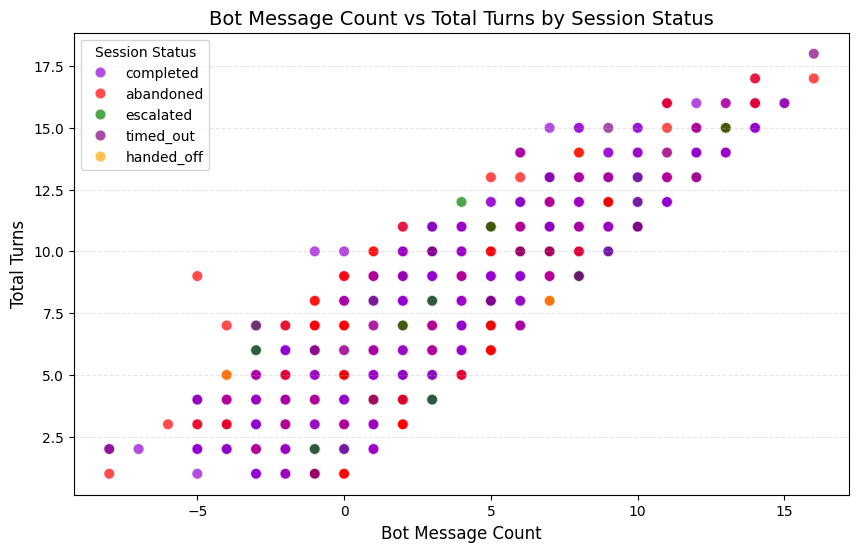

In [88]:
# Scatter Plot: Bot Message Count × Total Turns × Session Status
color_map = {
    'completed': 'darkviolet',
    'abandoned': 'red',
    'escalated': 'green',
    'handed_off': 'orange',
    'timed_out': 'purple'
}
plt.figure(figsize=(10,6))

sns.scatterplot(
    data = df_conversation_analytics,
    x = 'Bot Message Count',
    y = 'Total Turns',
    hue = 'Session Status',   # Categorical variable
    palette = color_map,
    alpha = 0.7,
    s= 60
)
plt.title('Bot Message Count vs Total Turns by Session Status', fontsize=14)
plt.xlabel('Bot Message Count', fontsize=12)
plt.ylabel('Total Turns', fontsize=12)
plt.legend(title='Session Status')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()


** Interpretation of Scatter Plot: Bot Message Count vs Total Turns by Session Status**

The scatter plot shows a strong positive relationship between **Bot Message Count** and **Total Turns**. As the bot sends more messages, the total number of turns in the conversation increases. This aligns with earlier numerical correlations and suggests that longer conversations typically require more back-and-forth exchanges from the bot.

**Completed Sessions (darkviolet)**
Completed sessions are distributed across a mid-range of bot messages and total turns, usually between 5–12 turns. This indicates that most successful interactions require a reasonable number of exchanges, suggesting efficient resolution with minimal friction.

**Abandoned Sessions (red)**
Abandoned conversations occur across various message counts, especially between 5–10 turns. Users tend to leave after multiple bot responses, indicating frustration, confusion, or unmet intent within the conversation.

**Escalated Sessions (green)**
Escalated cases cluster mostly around 6–12 turns. The bot attempts several messages before determining that the issue needs human intervention. This pattern highlights where automation is insufficient for resolving user needs.

**Timed-Out Sessions (light purple)**
Timed-out sessions show some of the highest total turn values, often surpassing 15 turns. Users disengage despite long interactions, which may indicate slow responses, unclear flow paths, or high cognitive load.

**Handed-Off Sessions (orange)**
These sessions appear in the mid-range turn count (5–10 turns). This reflects cases where the bot made multiple attempts but eventually decided a human agent was needed.

**Final Summary**
- Higher bot message counts correspond to longer conversation durations.
- Successful sessions maintain moderate turns, while problematic sessions (abandoned, timed_out, escalated) show higher turn counts.
- This pattern reveals where conversation design can be improved to reduce effort and increase successful completion.


##### Bot Message Count × Total Turns × Initial Intent

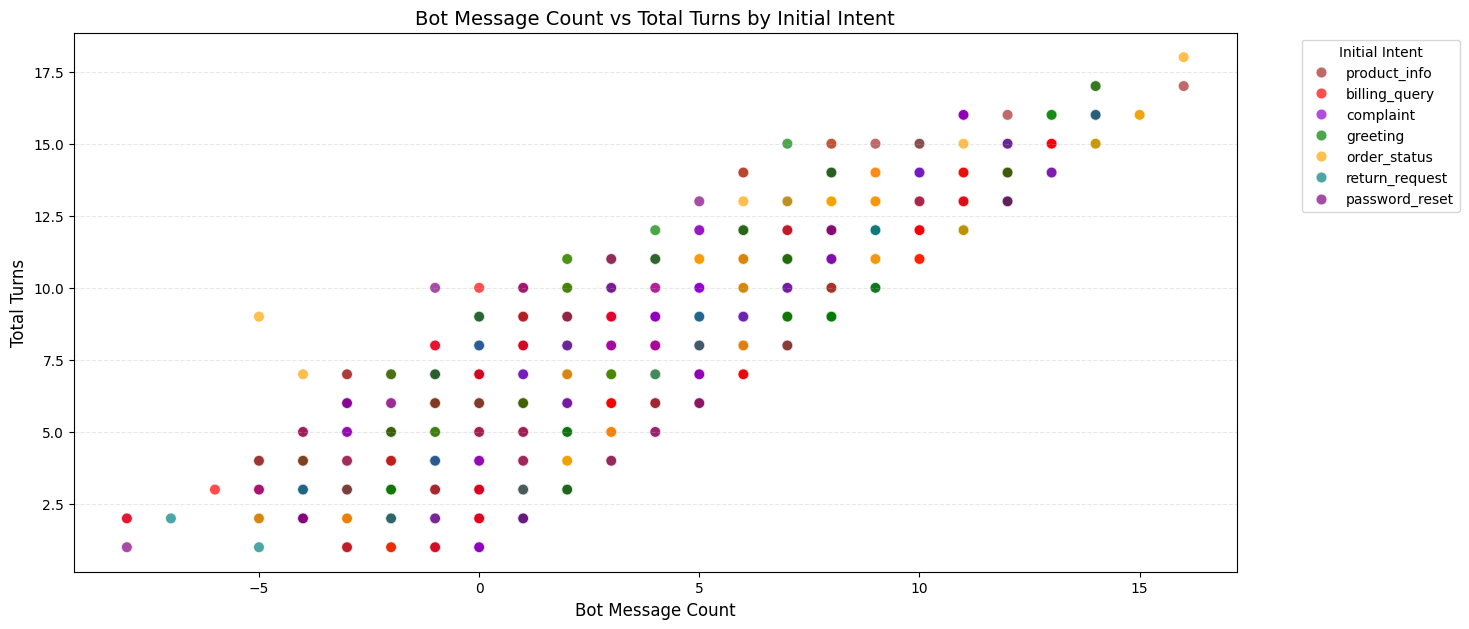

In [103]:
# Define custom colors for each Initial Intent
intent_colors = {
    'billing_query': 'red',
    'complaint': 'darkviolet',
    'greeting': 'green',
    'order_status': 'orange',
    'password_reset': 'purple',
    'product_info': 'brown',
    'return_request': 'teal'
}

# Scatter Plot: Bot Message Count × Total Turns × Initial Intent
plt.figure(figsize=(15,7))

sns.scatterplot(
    data = df_conversation_analytics,
    x = 'Bot Message Count',
    y = 'Total Turns',
    hue = 'Initial Intent',
    palette = intent_colors,
    alpha = 0.7,
    s = 60
)

plt.title('Bot Message Count vs Total Turns by Initial Intent', fontsize=14)
plt.xlabel('Bot Message Count', fontsize=12)
plt.ylabel('Total Turns', fontsize=12)
plt.legend(title='Initial Intent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


**Interpretation of Scatter Plot: Bot Message Count vs Total Turns by Initial Intent**

The scatter plot categorizes conversations based on **Initial Intent**, showing how different user intents impact bot interaction volume and overall conversation length. While the positive linear relationship between Bot Message Count and Total Turns remains consistent, the distribution varies depending on intent type.

**Billing Query (red)**
Billing queries cluster around 5–12 turns and moderate bot messages. These tasks require detailed verification, leading to balanced yet slightly lengthy conversations.

**Complaint (darkviolet)**
Complaint-related messages distribute across a wider spread. Emotional or complex issues cause more back-and-forth, increasing both bot messages and total turns.

**Greeting (green)**
Greeting intents fall on the lower end of both bot message count and conversation turns. These are typically introductory exchanges requiring minimal interaction.

**Order Status (orange)**
Order status queries show moderate-to-high interactions. Users often expect quick updates, but system checks prolong the flow.

**Password Reset (purple)**
Password reset queries span moderately high turns. Verification steps and safety protocols naturally require multiple bot messages, which extends the interaction.

**Product Info (brown)**
Product information requests are spread across a wide range of turn counts, indicating diverse user questions and varied depth of information required.

**Return Request (teal)**
Return requests settle in the mid-range of bot messages and turns. These flows involve clear procedural steps, leading to structured but moderate-length conversations.

**Final Summary**
- Intent type plays a significant role in determining how long a conversation becomes.
- Simpler intents (greeting) have fewer turns, while complex ones (complaints, product info) require more effort.
- High-intensity interactions (password reset, order status) demand additional verification steps, increasing bot responses and total turn count.


##### Bot Message Count × Total Turns × Channel

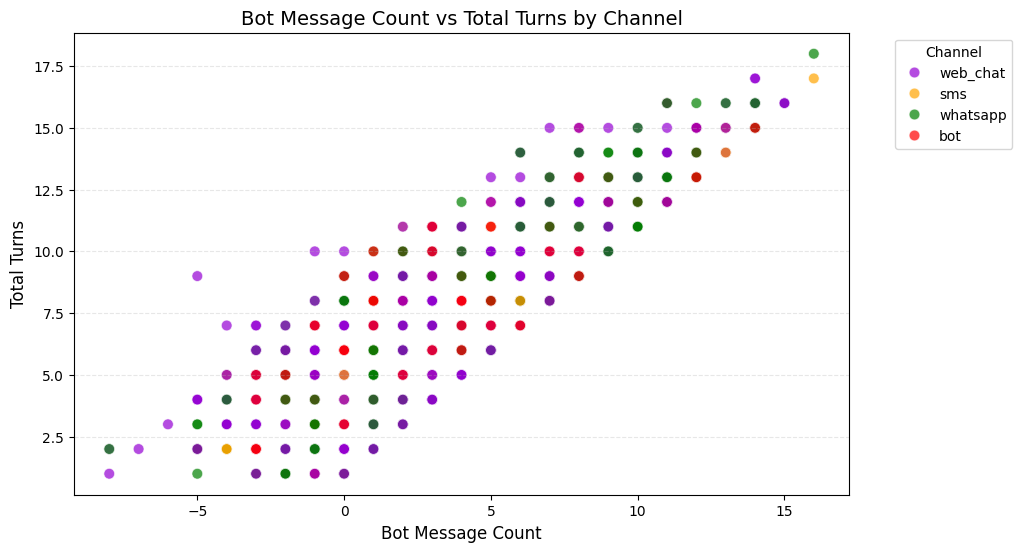

In [90]:
# Custom colors for each Channel
channel_colors = {
    'web_chat': 'darkviolet',
    'whatsapp': 'green',
    'bot': 'red',
    'sms': 'orange'
}

# Scatter Plot: Bot Message Count × Total Turns × Channel
plt.figure(figsize=(10,6))

sns.scatterplot(
    data = df_conversation_analytics,
    x = 'Bot Message Count',
    y = 'Total Turns',
    hue = 'Channel',
    palette = channel_colors,
    alpha = 0.7,
    s = 60
)

plt.title('Bot Message Count vs Total Turns by Channel', fontsize=14)
plt.xlabel('Bot Message Count', fontsize=12)
plt.ylabel('Total Turns', fontsize=12)
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


**Interpretation of Bot Message Count vs Total Turns by Channel**

The scatter plot shows how different communication channels influence the relationship between **Bot Message Count** and **Total Turns**. Across all channels, a consistent upward trend appears: as the bot sends more messages, the conversation length increases. However, each channel displays unique behavioral patterns.

**Web Chat (purple)**

Web Chat shows one of the largest spreads across both bot message counts and turn values. Many points fall between **6–15 total turns**, indicating deeper, more interactive sessions.

**Key Insight:**  
- Web Chat users tend to stay engaged longer, resulting in more bot messages and longer conversations.  
- Real-time typing and interface convenience encourage multi-step exchanges.

**WhatsApp (green)**

WhatsApp conversations largely cluster in the **mid-to-high conversation range**, often between **8–16 turns**. This channel shows strong participation and consistent message flow.

**Key Insight:**  
- WhatsApp users frequently engage in longer, more detailed conversations.  
- The familiarity and convenience of messaging apps support extended dialogue.

**Bot Interface (red)**

Bot interface conversations appear in the **low-to-mid turn range**, mostly from **4–10 total turns**. These interactions tend to be shorter and more structured.

**Key Insight:**  
- The bot interface delivers quicker resolutions with fewer steps.  
- Users complete tasks faster because of guided flows and predefined choices.

**SMS (orange)**

SMS has the lowest number of points and generally occupies the **lower end** of both bot messages and total turns. Sessions rarely exceed **8–10 turns**.

**Key Insight:**  
- SMS constraints (slow input, cost awareness, limited UI) shorten interactions.  
- Users keep conversations brief, reducing bot message volume.

**Summary of Channel Behavior**

- **Web Chat and WhatsApp** → longer, more interactive sessions  
- **Bot Interface** → moderate-length conversations with efficient flow  
- **SMS** → short, low-interaction sessions  
- Channel design strongly affects how long users engage and how many bot messages are needed.

**Final Interpretation**

Different channels shape user engagement patterns.  
While the underlying trend remains positive (more bot messages → longer conversations), the channel determines how extensive these interactions become. Channels with richer interfaces (Web Chat, WhatsApp) naturally promote longer conversations, while simpler platforms (SMS, traditional bot UI) lead to shorter, more direct interactions.
